In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import missingno as msno
import matplotlib.pyplot as plt
from feature_engine.imputation import RandomSampleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/output_database/global_power_plant_database.csv', low_memory =False)


In [2]:
columnas_traducidas = {
    'country': 'codigo_pais',
    'country_long': 'pais',
    'name': 'nombre_planta',
    'gppd_idnr': 'identificacion_planta',
    'capacity_mw': 'capacidad_mw',
    'latitude': 'latitud',
    'longitude': 'longitud',
    'primary_fuel': 'tipo_combustible(primario)',
    'other_fuel1': 'otro_combustible1',
    'other_fuel2': 'otro_combustible2',
    'other_fuel3': 'otro_combustible3',
    'commissioning_year': 'año_apertura',
    'owner': 'propietario',
    'source': 'fuente',
    'url': 'url',
    'geolocation_source': 'fuente_geolocalizacion',
    'wepp_id': 'id_wepp',
    'year_of_capacity_data': 'anual_datos_capacidad',
    'generation_gwh_2013': 'generacion_gwh_2013',
    'generation_gwh_2014': 'generacion_gwh_2014',
    'generation_gwh_2015': 'generacion_gwh_2015',
    'generation_gwh_2016': 'generacion_gwh_2016',
    'generation_gwh_2017': 'generacion_gwh_2017',
    'generation_gwh_2018': 'generacion_gwh_2018',
    'generation_gwh_2019': 'generacion_gwh_2019',
    'generation_data_source': 'fuente_datos_generacion',
    'estimated_generation_gwh_2013': 'generacion_estimado_gwh_2013',
    'estimated_generation_gwh_2014': 'generacion_estimado_gwh_2014',
    'estimated_generation_gwh_2015': 'generacion_estimado_gwh_2015',
    'estimated_generation_gwh_2016': 'generacion_estimado_gwh_2016',
    'estimated_generation_gwh_2017': 'generacion_estimado_gwh_2017',
    'estimated_generation_note_2013': 'nota_generacion_estimado_2013',
    'estimated_generation_note_2014': 'nota_generacion_estimado_2014',
    'estimated_generation_note_2015': 'nota_generacion_estimado_2015',
    'estimated_generation_note_2016': 'nota_generacion_estimado_2016',
    'estimated_generation_note_2017': 'nota_generacion_estimado_2017'
}
df.rename(columns=columnas_traducidas, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   codigo_pais                    34936 non-null  object 
 1   pais                           34936 non-null  object 
 2   nombre_planta                  34936 non-null  object 
 3   identificacion_planta          34936 non-null  object 
 4   capacidad_mw                   34936 non-null  float64
 5   latitud                        34936 non-null  float64
 6   longitud                       34936 non-null  float64
 7   tipo_combustible(primario)     34936 non-null  object 
 8   otro_combustible1              1944 non-null   object 
 9   otro_combustible2              276 non-null    object 
 10  otro_combustible3              92 non-null     object 
 11  año_apertura                   17447 non-null  float64
 12  propietario                    20868 non-null 

In [4]:
df.head()

codigo_pais         pais                                     nombre_planta  \
0         AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan                                      Kandahar DOG   
2         AFG  Afghanistan                                      Kandahar JOL   
3         AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4         AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

  identificacion_planta  capacidad_mw  latitud  longitud  \
0          GEODB0040538          33.0   32.322   65.1190   
1            WKS0070144          10.0   31.670   65.7950   
2            WKS0071196          10.0   31.623   65.7920   
3          GEODB0040541          66.0   34.556   69.4787   
4          GEODB0040534         100.0   34.641   69.7170   

  tipo_combustible(primario) otro_combustible1 otro_combustible2  ...  \
0                      Hydro               NaN               NaN  ...   
1                      Solar               NaN               NaN  ...   
2                      Solar               NaN               NaN  ...   
3                      Hydro               NaN               NaN  ...   
4                      Hydro               NaN               NaN  ...   

  generacion_estimado_gwh_2013  generacion_estimado_gwh_2014  \
0                       123.77                        162.90   
1                        18.43                         17.48   
2                        18.64                         17.58   
3                       225.06                        203.55   
4                       406.16                        357.22   

  generacion_estimado_gwh_2015 generacion_estimado_gwh_2016  \
0                        97.39                       137.76   
1                        18.25                        17.70   
2                        19.10                        17.62   
3                       146.90                       230.18   
4                       270.99                       395.38   

  generacion_estimado_gwh_2017 nota_generacion_estimado_2013  \
0                       119.50                      HYDRO-V1   
1                        18.29               SOLAR-V1-NO-AGE   
2                        18.72               SOLAR-V1-NO-AGE   
3                       174.91                      HYDRO-V1   
4                       350.80                      HYDRO-V1   

  nota_generacion_estimado_2014  nota_generacion_estimado_2015  \
0                      HYDRO-V1                       HYDRO-V1   
1               SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
2               SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
3                      HYDRO-V1                       HYDRO-V1   
4                      HYDRO-V1                       HYDRO-V1   

   nota_generacion_estimado_2016  nota_generacion_estimado_2017  
0                       HYDRO-V1                       HYDRO-V1  
1                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE  
2                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE  
3                       HYDRO-V1                       HYDRO-V1  
4                       HYDRO-V1                       HYDRO-V1  

[5 rows x 36 columns]

In [5]:
df['año_apertura'] = (
    df['año_apertura']
    .astype(str)
    .str.extract(r'(\d{4})')
    .astype(float)
    .astype('Int64')
)

In [6]:
# Mapa de nombres de combustible en español
mapa_traducciones = {
    'Hydro': 'Hidroelectrico',
    'Solar': 'Solar',
    'Gas': 'Gas',
    'Other': 'Otro',
    'Oil': 'Petroleo',
    'Wind': 'Eolico',
    'Nuclear': 'Nuclear',
    'Coal': 'Carbon',
    'Waste': 'Residuos',
    'Biomass': 'Biomasa',
    'Wave and Tidal': 'Olas y Mareas',
    'Petcoke': 'Petcoke',
    'Geothermal': 'Geotermico',
    'Storage': 'Almacenamiento',
    'Cogeneration': 'Cogeneracion'
}
# Reemplazar los nombres en el DataFrame con el mapeo de traducciones
df['tipo_combustible(primario)'] = df['tipo_combustible(primario)'].map(mapa_traducciones)

In [7]:
# 1. Calcular la capacidad total por país y tipo de combustible "grid cap"
df.loc[:, 'capacidad_total'] = df.groupby(['codigo_pais', 'tipo_combustible(primario)'])['capacidad_mw'].transform('sum')

# 2. Calcular el factor de capacidad promedio por tipo de combustible "fuel.cf"
df.loc[:, 'factor_capacidad_combustible'] = df.groupby('tipo_combustible(primario)')['capacidad_mw'].transform('sum')

# 3. Calcular el factor de capacidad para cada planta
df.loc[:, 'factor_capacidad_planta'] = df['capacidad_mw'] / df['factor_capacidad_combustible']

# 4. Calcular el factor de capacidad individual basado en la capacidad total "cf.ind"
df.loc[:, 'factor_capacidad_individual'] = np.where(
    df['capacidad_total'] > 0.5,
    0.5 + 0.5 * (df['factor_capacidad_planta'] - 0.5) / (1 - 0.5),
    0.5 * df['factor_capacidad_planta'] / 0.5
)

# 5. # Calcular participación relativa nacional
df.loc[:, 'participacion_relativa_nacional'] = df['capacidad_mw'] / df.groupby('pais')['capacidad_mw'].transform('sum')


<Figure size 1200x800 with 0 Axes>

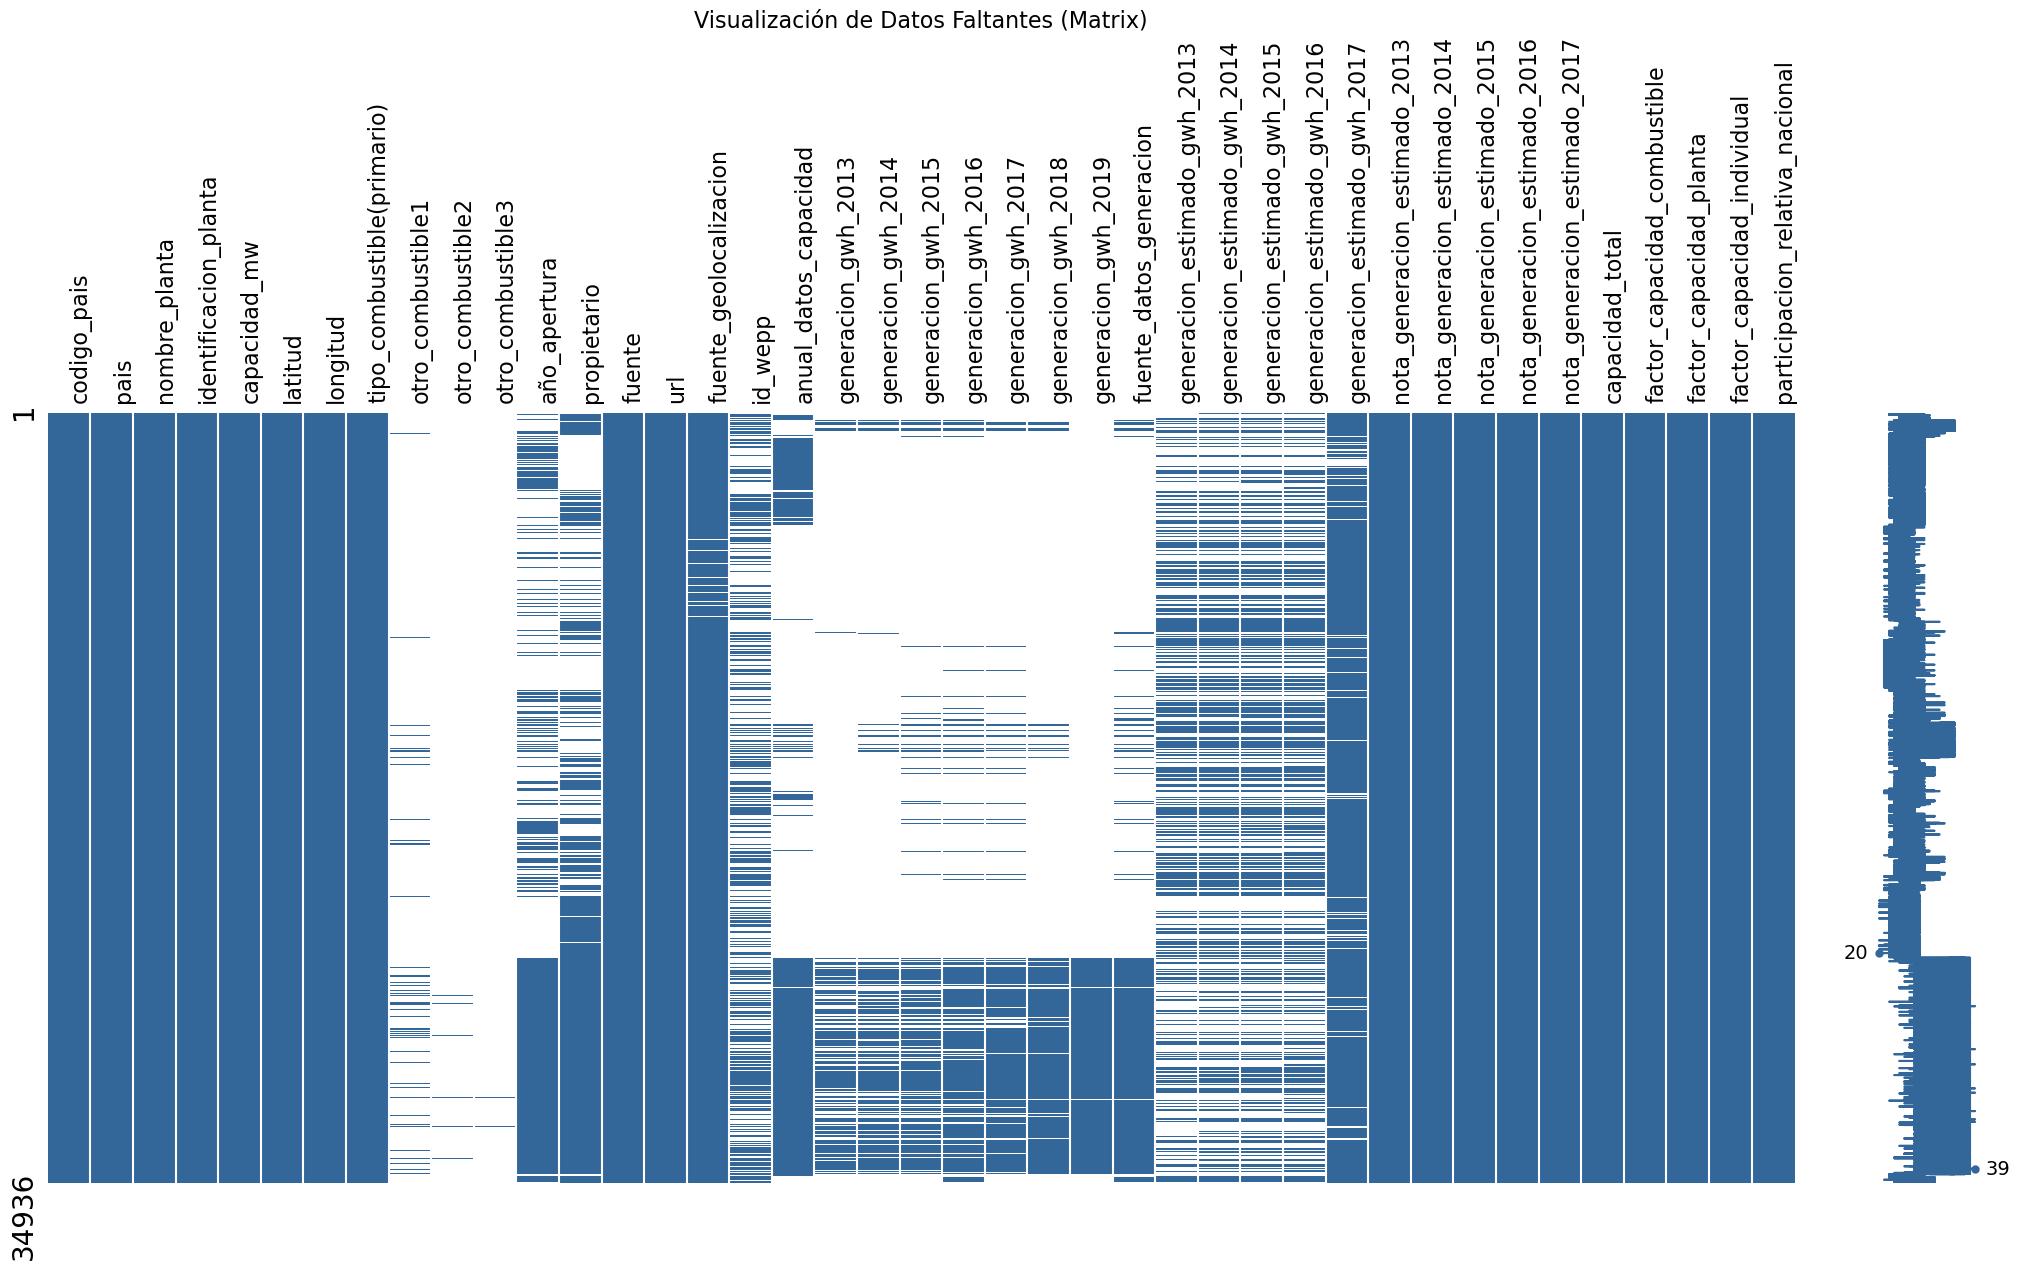

In [8]:

# Visualizar los datos faltantes con missingno (Matrix)
plt.figure(figsize=(12, 8))
msno.matrix(df, color=(0.2, 0.4, 0.6))  # Puedes ajustar el color según prefieras

# Ajustar el título del gráfico
plt.title('Visualización de Datos Faltantes (Matrix)', fontsize=16)
# Rotar las etiquetas del eje x y el eje y a 90 grados
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Guardar la figura en un archivo PNG
plt.savefig('visualizacion_datos_faltantes_matrix.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [9]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)


otro_combustible3                  99.736661
otro_combustible2                  99.209984
otro_combustible1                  94.435539
generacion_gwh_2013                81.632127
generacion_gwh_2014                79.316464
generacion_gwh_2015                76.519922
generacion_gwh_2016                73.826425
generacion_gwh_2017                72.807419
generacion_gwh_2018                72.415274
generacion_gwh_2019                72.352301
fuente_datos_generacion            67.368903
anual_datos_capacidad              57.387795
generacion_estimado_gwh_2013       53.858484
id_wepp                            53.532173
generacion_estimado_gwh_2014       52.762194
generacion_estimado_gwh_2015       51.196474
año_apertura                       50.060110
generacion_estimado_gwh_2016       49.708038
propietario                        40.267918
generacion_estimado_gwh_2017        5.146554
fuente_geolocalizacion              1.199336
url                                 0.051523
fuente    

In [10]:
# 5. Imputar valores faltantes
# Para cada año, se imputan los valores de generación estimada utilizando el factor de capacidad individual.
for year in ['2013', '2014', '2015', '2016', '2017']:
    col_generacion = f'generacion_estimado_gwh_{year}'
    col_imputada = f'generacion_estimado_gwh_{year}_imputada'
    # Copiar los valores de generación estimada a una nueva columna de imputación
    df[col_imputada] = df[col_generacion]
    # Imputar los valores faltantes en la columna de generación estimada
    df.loc[df[col_generacion].isna(), col_imputada] = df['capacidad_mw'] * df['factor_capacidad_individual']

# Ahora df tiene columnas imputadas para cada año especificado, usando el factor de capacidad individual ajustado.


<Figure size 1200x800 with 0 Axes>

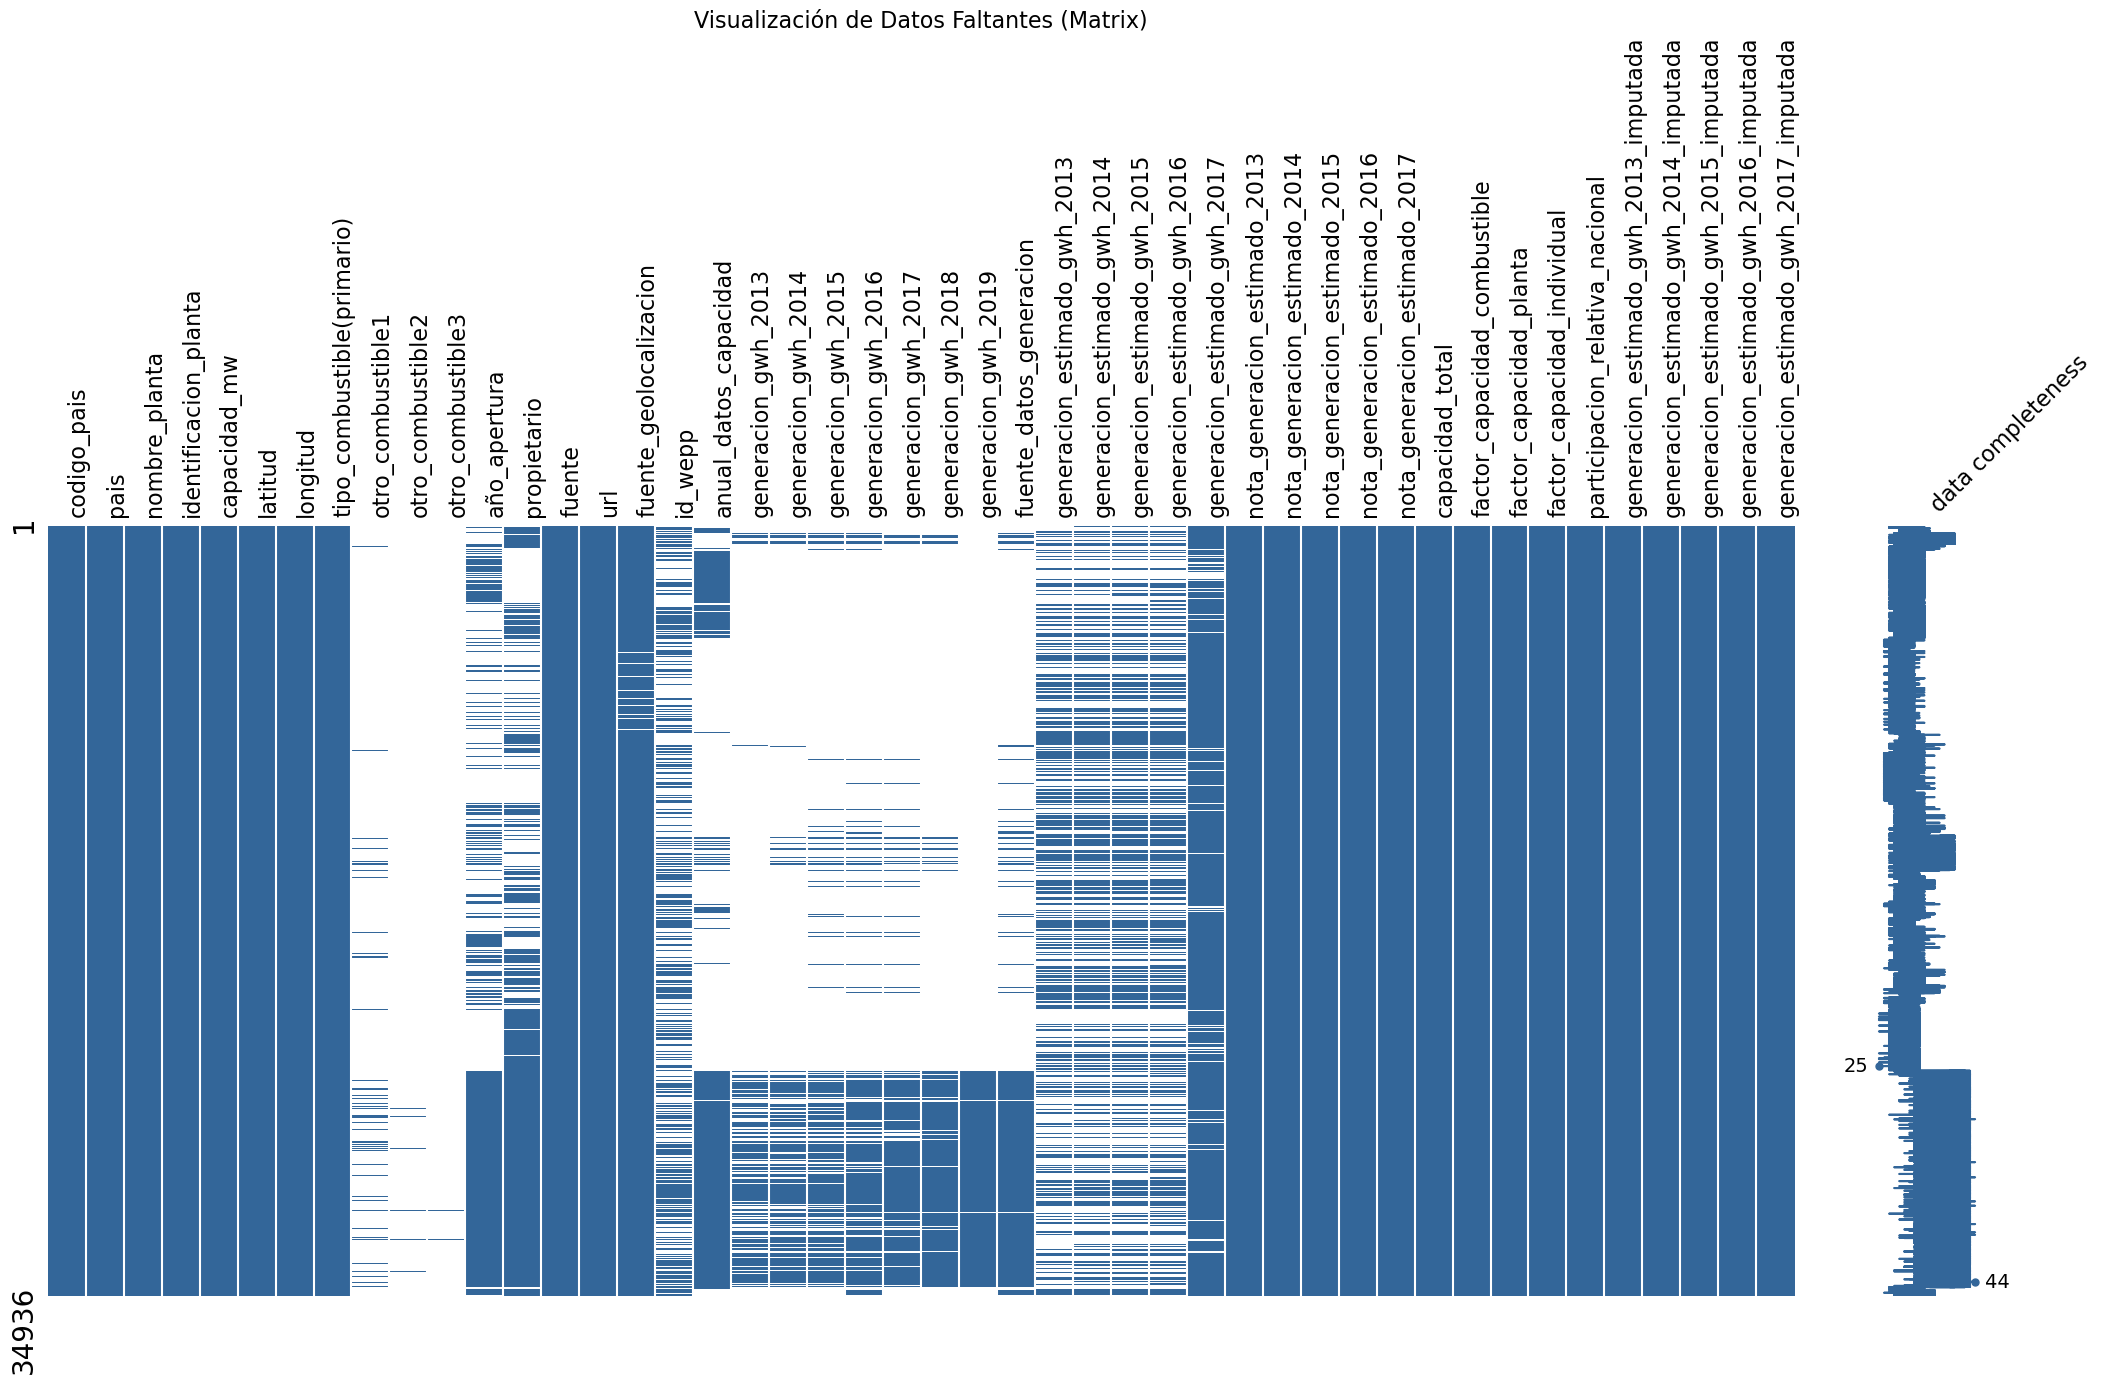

In [11]:
# Visualizar los datos faltantes con missingno (Matrix)
plt.figure(figsize=(12, 8))
msno.matrix(df, color=(0.2, 0.4, 0.6), labels={'rotate': 90})  # Rotar las etiquetas 90 grados

# Ajustar el título del gráfico
plt.title('Visualización de Datos Faltantes (Matrix)', fontsize=16)
# Rotar las etiquetas del eje x y el eje y a 90 grados
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Guardar la figura en un archivo PNG
plt.savefig('visualizacion_datos_faltantes_matrix.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

/tmp/ipykernel_79989/2641967359.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_original['año_apertura'], color='blue', shade=True)
/tmp/ipykernel_79989/2641967359.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['año_apertura'], color='green', shade=True)


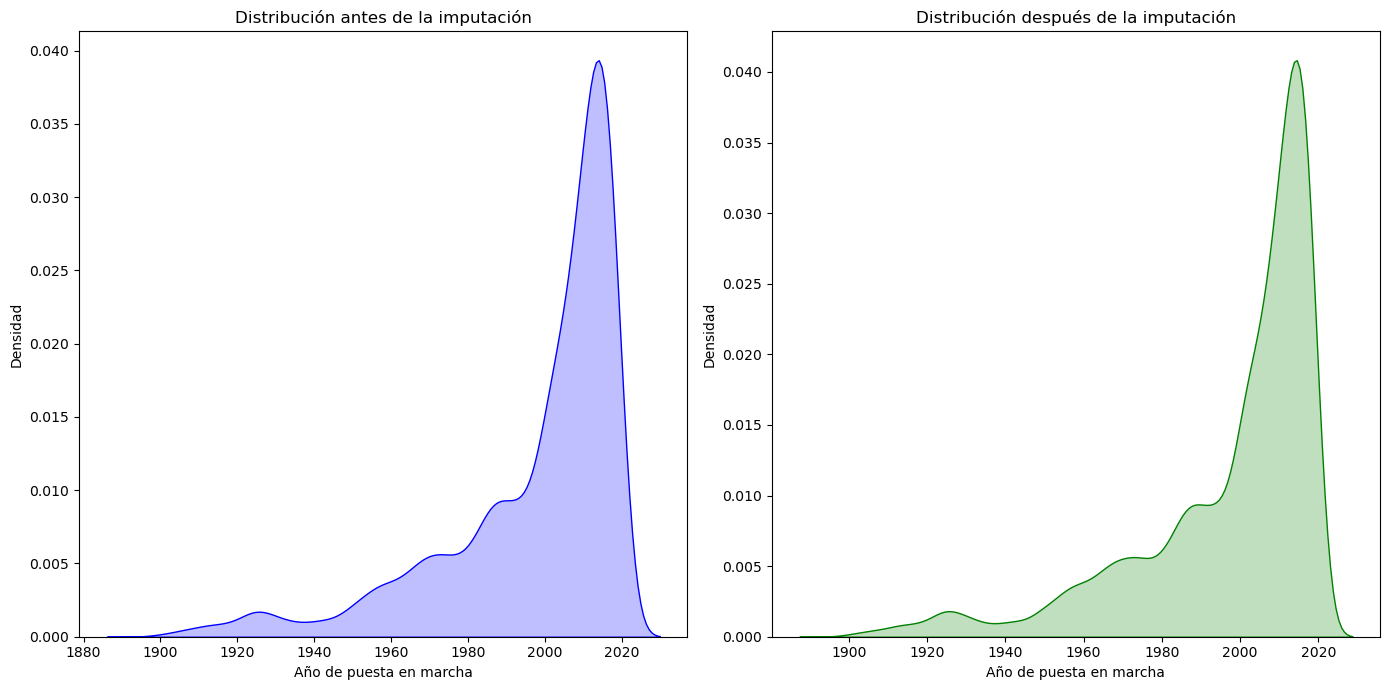

In [12]:

# Copia del DataFrame antes de la imputación
df_original = df.copy()

# Imputar los valores nulos usando RandomSampleImputer
rsi = RandomSampleImputer(random_state=42)
df['año_apertura'] = rsi.fit_transform(df[['año_apertura']])

# Graficar la distribución KDE antes y después de la imputación
plt.figure(figsize=(14, 7))

# KDE antes de la imputación
plt.subplot(1, 2, 1)
sns.kdeplot(df_original['año_apertura'], color='blue', shade=True)
plt.title('Distribución antes de la imputación')
plt.xlabel('Año de puesta en marcha')
plt.ylabel('Densidad')

# KDE después de la imputación
plt.subplot(1, 2, 2)
sns.kdeplot(df['año_apertura'], color='green', shade=True)
plt.title('Distribución después de la imputación')
plt.xlabel('Año de puesta en marcha')
plt.ylabel('Densidad')

plt.tight_layout()
plt.savefig('distribucion_año_apertura_imputacion_kde.png')
plt.show()


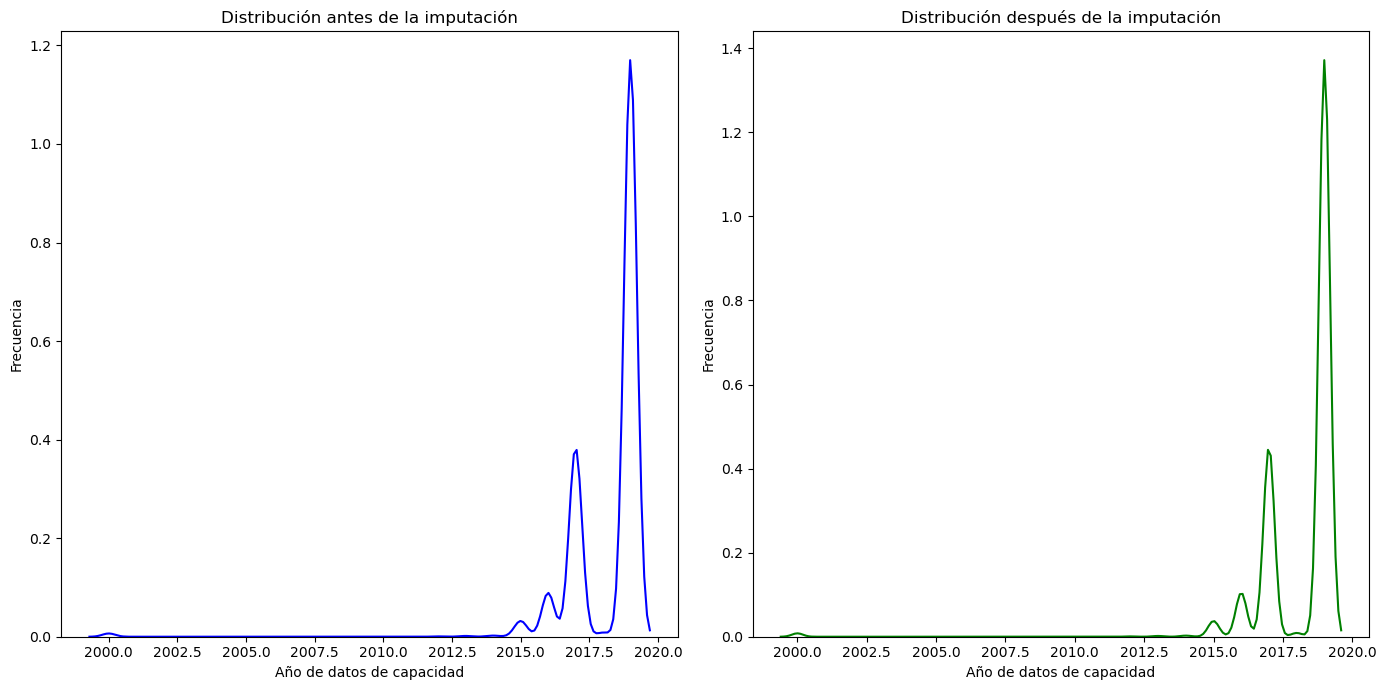

In [13]:
# Copia del DataFrame antes de la imputación
df_original = df.copy()

# Imputar los valores nulos usando RandomSampleImputer
rsi = RandomSampleImputer(random_state=42)
df['anual_datos_capacidad'] = rsi.fit_transform(df[['anual_datos_capacidad']])

# Graficar la distribución antes y después de la imputación
plt.figure(figsize=(14, 7))

# Histograma antes de la imputación
plt.subplot(1, 2, 1)
sns.kdeplot(df_original['anual_datos_capacidad'], color='blue')
plt.title('Distribución antes de la imputación')
plt.xlabel('Año de datos de capacidad')
plt.ylabel('Frecuencia')

# Histograma después de la imputación
plt.subplot(1, 2, 2)
sns.kdeplot(df['anual_datos_capacidad'], color='green')
plt.title('Distribución después de la imputación')
plt.xlabel('Año de datos de capacidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

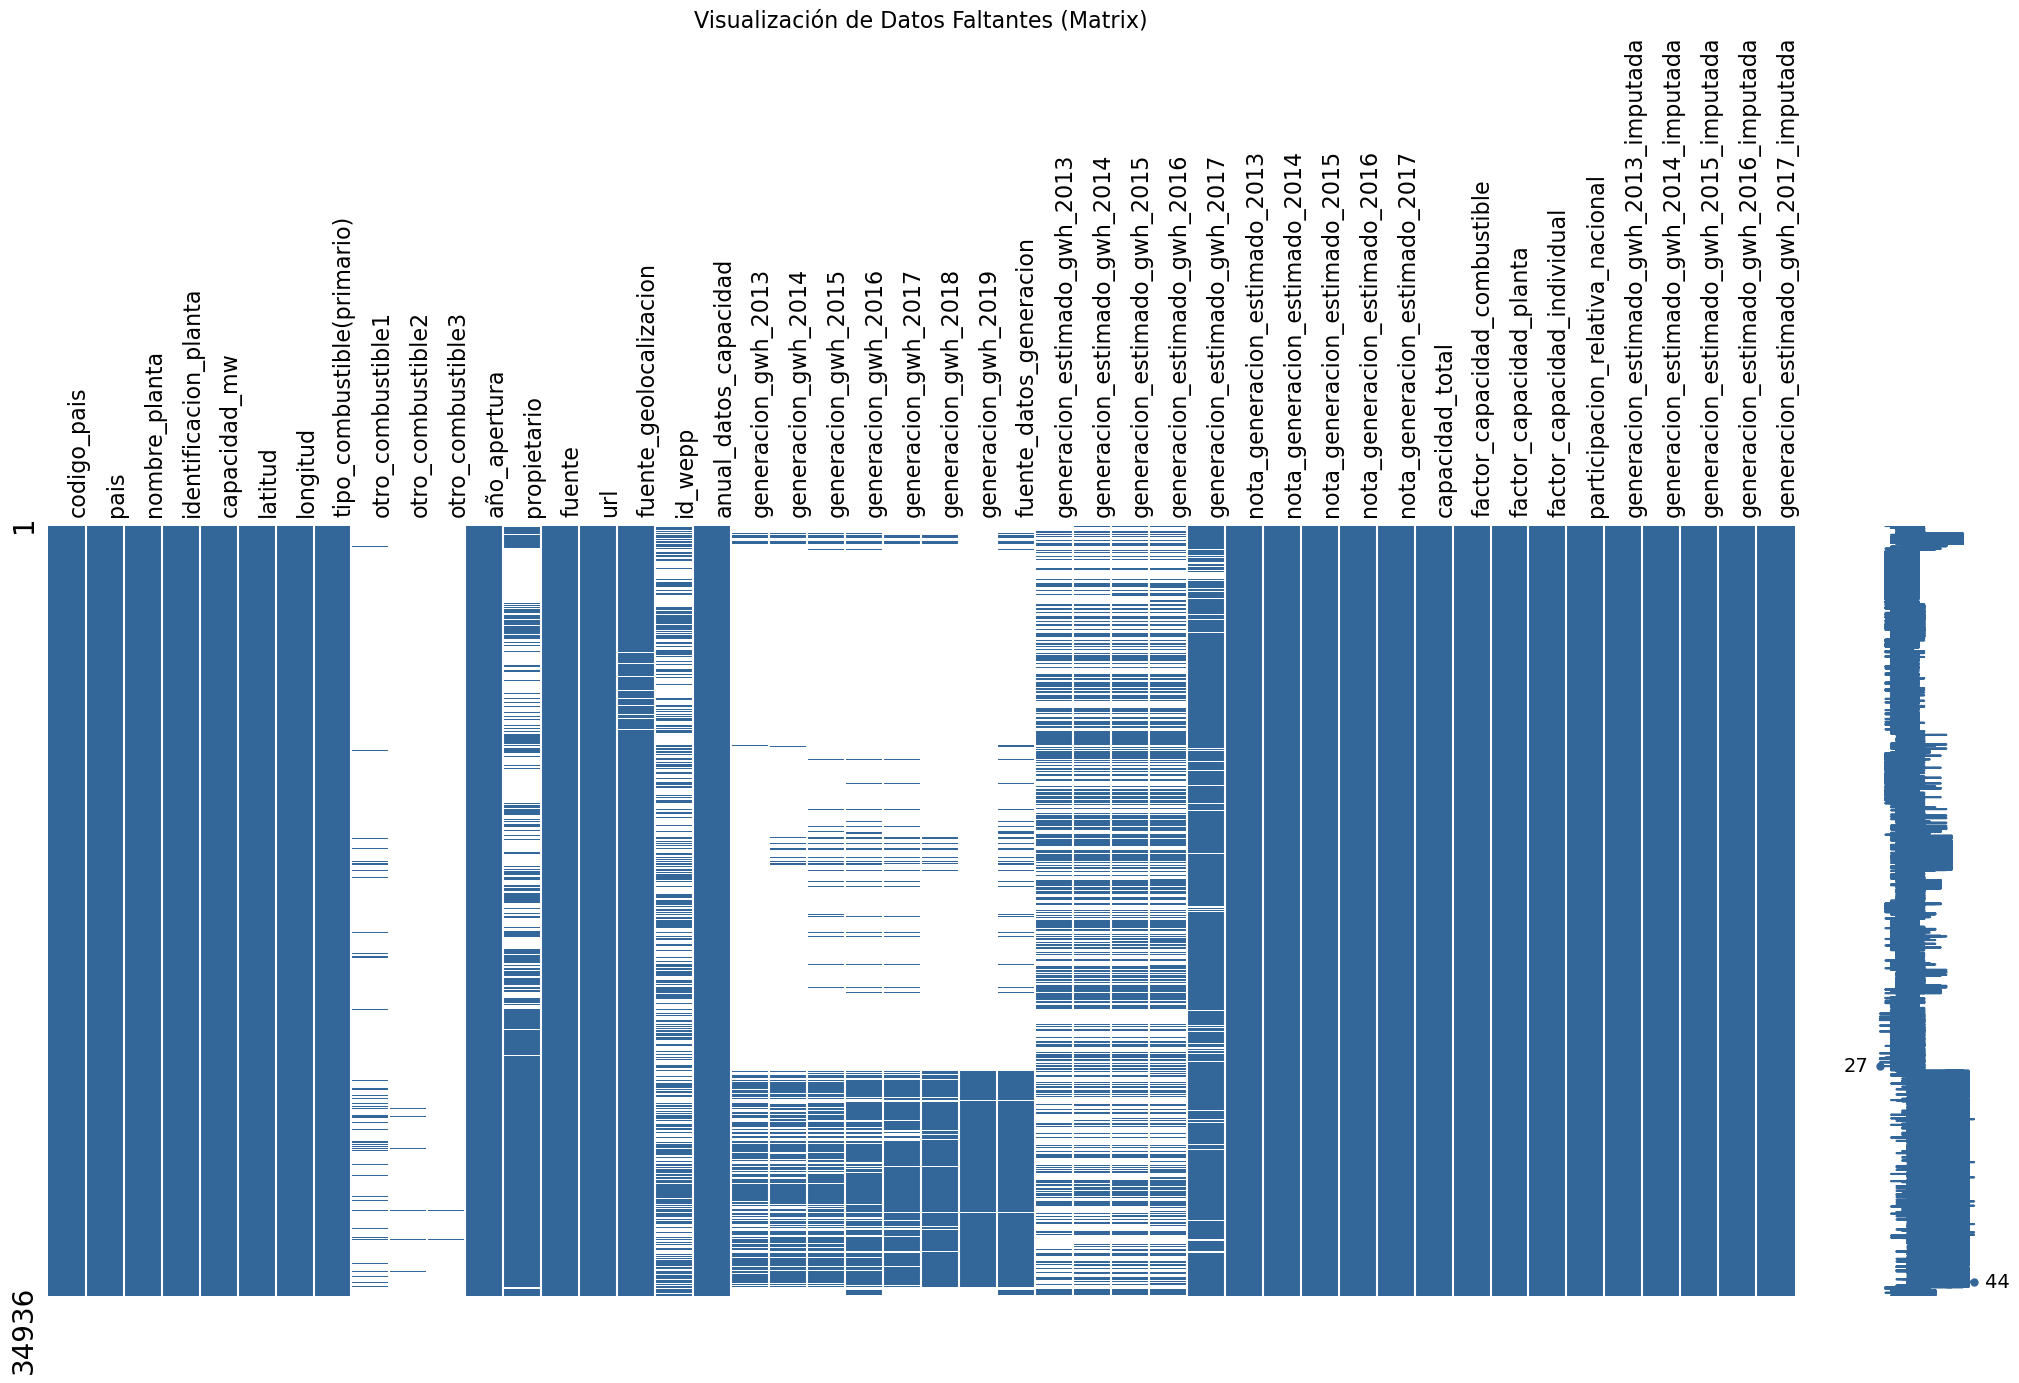

In [14]:

# Visualizar los datos faltantes con missingno (Matrix)
plt.figure(figsize=(12, 8))
msno.matrix(df, color=(0.2, 0.4, 0.6))  # Puedes ajustar el color según prefieras

# Ajustar el título del gráfico
plt.title('Visualización de Datos Faltantes (Matrix)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=90)

# Guardar la figura en un archivo PNG
plt.savefig('visualizacion_datos_faltantes_matrix.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()

In [15]:
# Variable Objetivo (Target Variable)
y = 'generacion_estimado_gwh_2017_imputada'

# Variables Predictoras (Predictor Variables)
X = [
    'capacidad_mw',
    'capacidad_total',
    'factor_capacidad_combustible',
    'factor_capacidad_planta',
    'factor_capacidad_individual',
    'participacion_relativa_nacional',
    'año_apertura',
    'latitud',
    'longitud',
    'anual_datos_capacidad',
    
]


In [16]:

# División de datos en entrenamiento y prueba (manteniendo la misma semilla)
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)


/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Regresión Lineal
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 609590.907
    - Raíz del Error Cuadrático Medio (RMSE): 780.763
    - Error Absoluto Medio (MAE): 225.352
    - Coeficiente de Determinación (R²): 0.894
  - Prueba:
    - Error Cuadrático Medio (MSE): 620139.898
    - Raíz del Error Cuadrático Medio (RMSE): 787.490
    - Error Absoluto Medio (MAE): 225.504
    - Coeficiente de Determinación (R²): 0.902


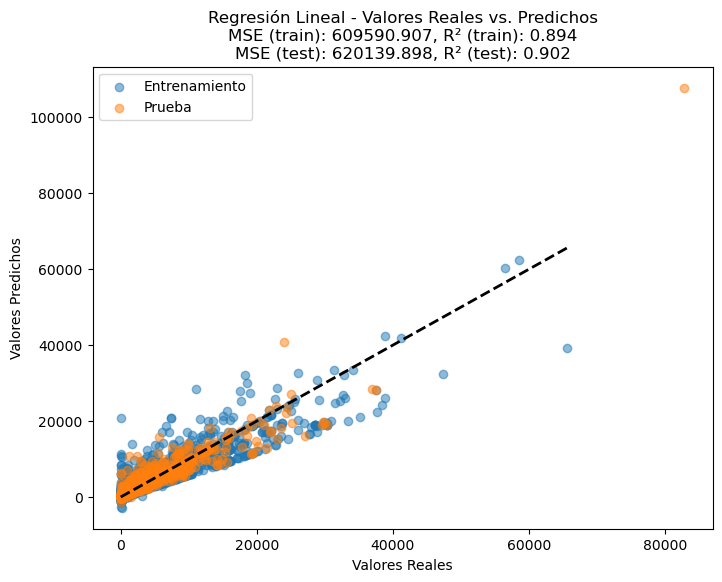

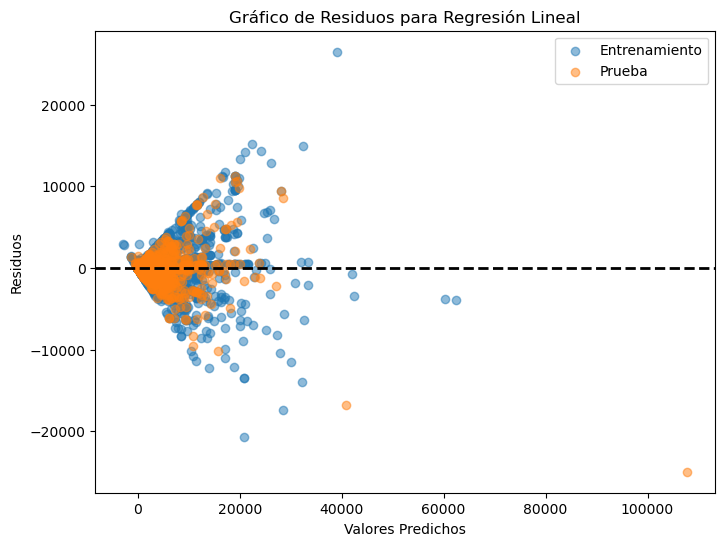

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 2. Entrenamiento del modelo de Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 3. Evaluación del modelo

# Predicciones en entrenamiento y prueba
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Métricas de evaluación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
mae_train = mean_absolute_error(y_train,  
 y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
mae_test = mean_absolute_error(y_test,  
 y_pred_test)
r2_test = r2_score(y_test, y_pred_test)  


# Imprimir métricas
print("\nModelo: Regresión Lineal")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# 4. Visualización de resultados

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Lineal - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_lineal.png') 
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Lineal')
plt.legend()
plt.savefig('residuos_regresion_lineal.png') 
plt.show()


/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.34164e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Regresión Ridge
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 609864.410
    - Raíz del Error Cuadrático Medio (RMSE): 780.938
    - Error Absoluto Medio (MAE): 225.659
    - Coeficiente de Determinación (R²): 0.894
  - Prueba:
    - Error Cuadrático Medio (MSE): 619699.397
    - Raíz del Error Cuadrático Medio (RMSE): 787.210
    - Error Absoluto Medio (MAE): 225.807
    - Coeficiente de Determinación (R²): 0.902


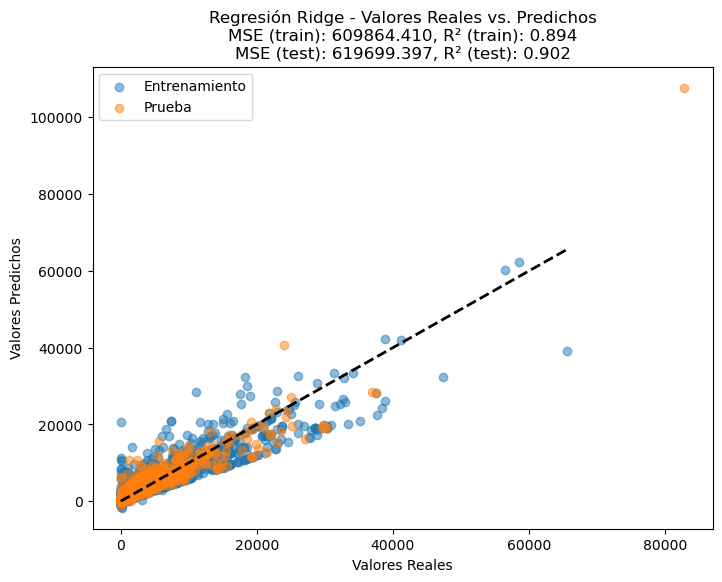

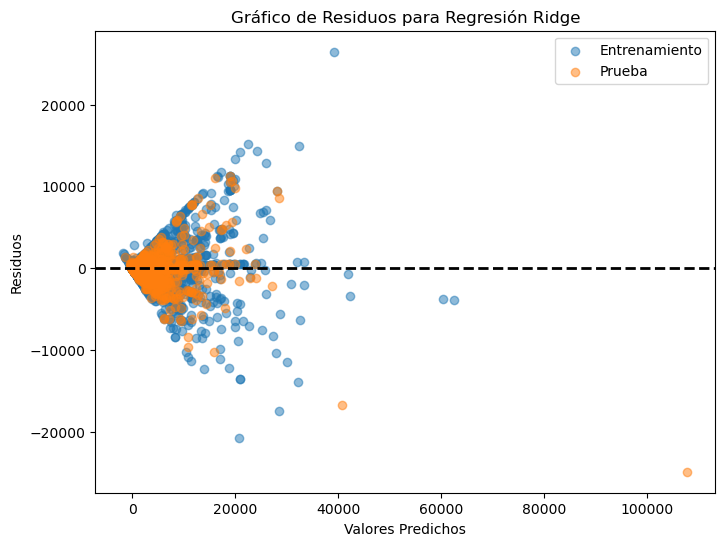

In [18]:
# Entrenamiento del modelo de Regresión Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)

# Métricas de evaluación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Regresión Ridge")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Ridge - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_ridge.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Ridge')
plt.legend()
plt.savefig('residuos_ridge.png')  # Guardar el gráfico de residuos en PNG
plt.show()


/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Regresión Lasso
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 609820.740
    - Raíz del Error Cuadrático Medio (RMSE): 780.910
    - Error Absoluto Medio (MAE): 225.646
    - Coeficiente de Determinación (R²): 0.894
  - Prueba:
    - Error Cuadrático Medio (MSE): 619610.043
    - Raíz del Error Cuadrático Medio (RMSE): 787.153
    - Error Absoluto Medio (MAE): 225.806
    - Coeficiente de Determinación (R²): 0.902


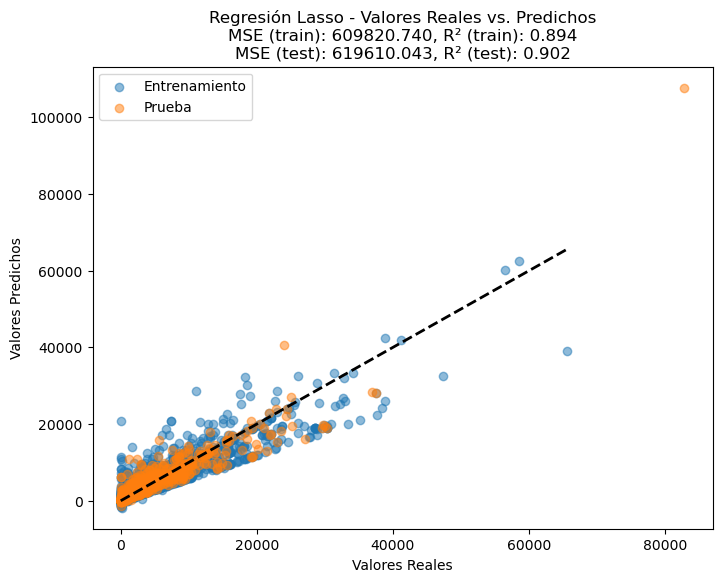

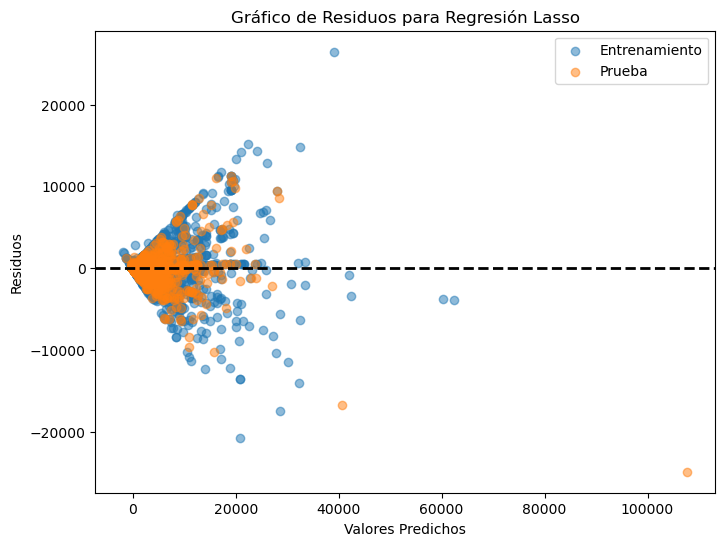

In [19]:
# Entrenamiento del modelo de Regresión Lasso
model_lasso = Lasso(alpha=0.1, max_iter=1000, tol=1e-4, selection='random')
model_lasso.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(X_test)

# Métricas de evaluación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Regresión Lasso")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Lasso - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_lasso.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Lasso')
plt.legend()
plt.savefig('residuos_lasso.png')  # Guardar el gráfico de residuos en PNG
plt.show()


/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Regresión ElasticNet
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 614830.633
    - Raíz del Error Cuadrático Medio (RMSE): 784.111
    - Error Absoluto Medio (MAE): 227.873
    - Coeficiente de Determinación (R²): 0.893
  - Prueba:
    - Error Cuadrático Medio (MSE): 617490.706
    - Raíz del Error Cuadrático Medio (RMSE): 785.806
    - Error Absoluto Medio (MAE): 227.929
    - Coeficiente de Determinación (R²): 0.903


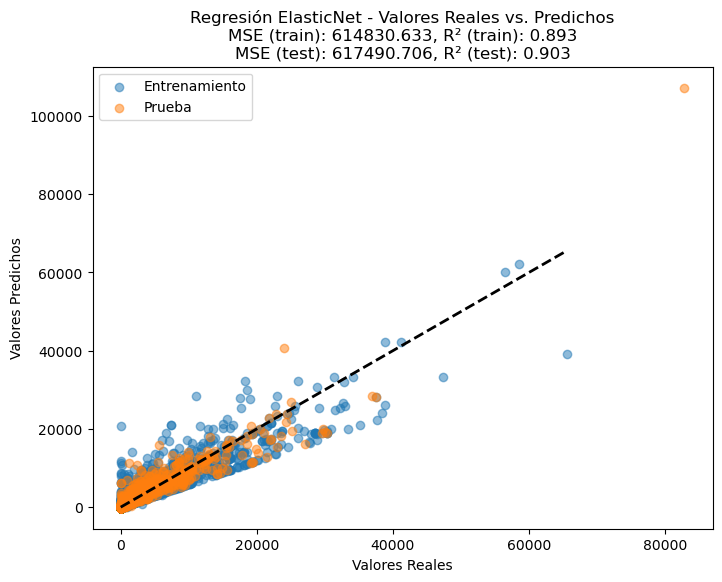

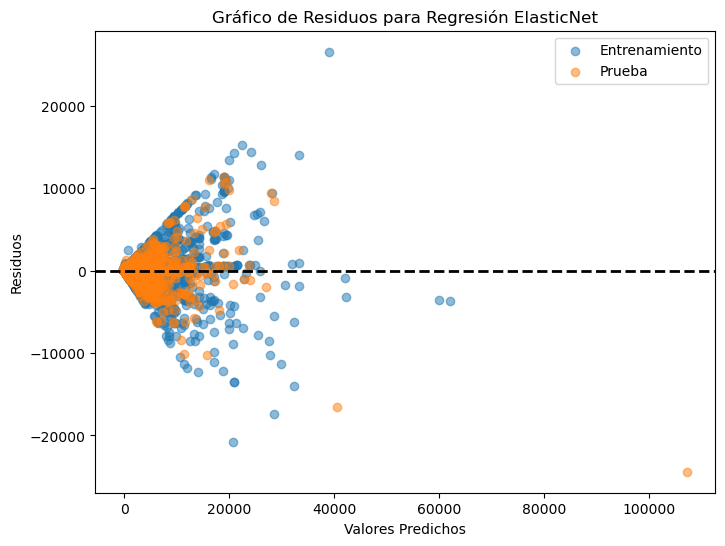

In [20]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Definir el modelo ElasticNet
model_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_elasticnet.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_elasticnet.predict(X_train)
y_pred_test = model_elasticnet.predict(X_test)

# Métricas de evaluación para entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Métricas de evaluación para prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Regresión ElasticNet")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión ElasticNet - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_elastic_net.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión ElasticNet')
plt.legend()
plt.savefig('residuos_elastic_net.png')  # Guardar el gráfico de residuos en PNG
plt.show()


/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Regresión Huber
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 639583.001
    - Raíz del Error Cuadrático Medio (RMSE): 799.739
    - Error Absoluto Medio (MAE): 200.997
    - Coeficiente de Determinación (R²): 0.889
  - Prueba:
    - Error Cuadrático Medio (MSE): 595598.402
    - Raíz del Error Cuadrático Medio (RMSE): 771.750
    - Error Absoluto Medio (MAE): 200.330
    - Coeficiente de Determinación (R²): 0.906


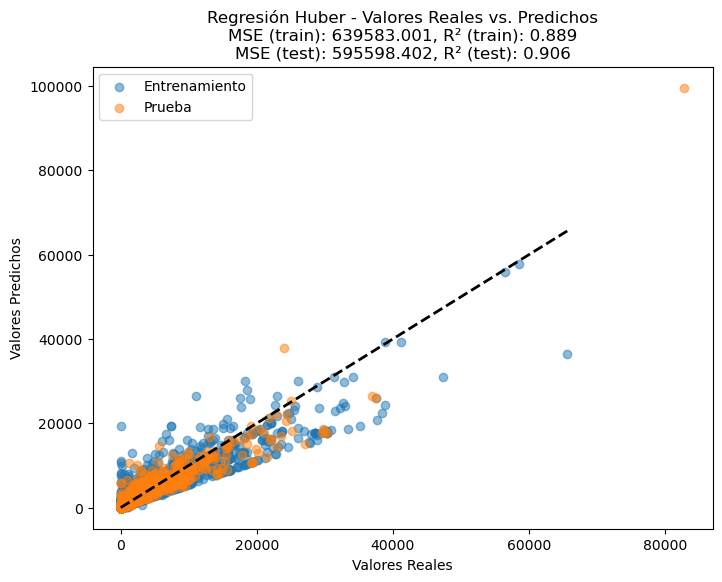

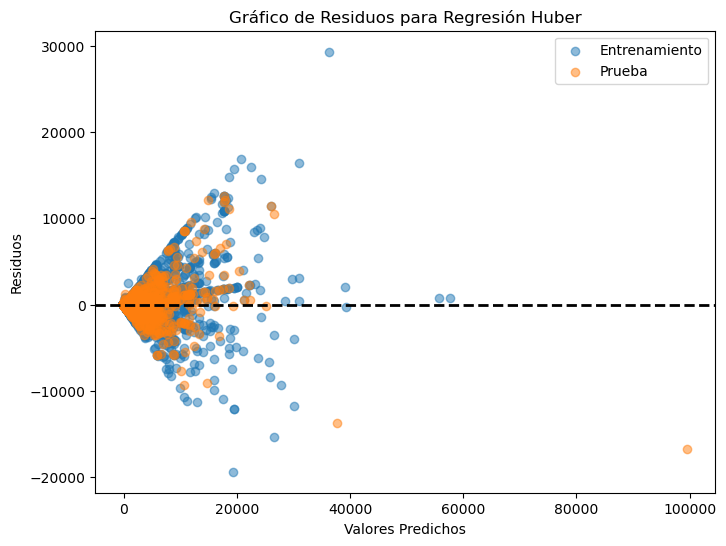

In [21]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. Entrenamiento del modelo de Regresión Huber
model_huber = HuberRegressor()
model_huber.fit(X_train, y_train)

# 3. Evaluación del modelo

# Predicciones en entrenamiento y prueba
y_pred_train = model_huber.predict(X_train)
y_pred_test = model_huber.predict(X_test)

# Métricas de evaluación
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Regresión Huber")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# 4. Visualización de resultados

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Huber - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_huber.png') 
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Huber')
plt.legend()
plt.savefig('residuos_regresion_huber.png') 
plt.show()

/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: SVR
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 5595578.594
    - Raíz del Error Cuadrático Medio (RMSE): 2365.498
    - Error Absoluto Medio (MAE): 609.434
    - Coeficiente de Determinación (R²): 0.029
  - Prueba:
    - Error Cuadrático Medio (MSE): 6208657.036
    - Raíz del Error Cuadrático Medio (RMSE): 2491.718
    - Error Absoluto Medio (MAE): 617.156
    - Coeficiente de Determinación (R²): 0.022


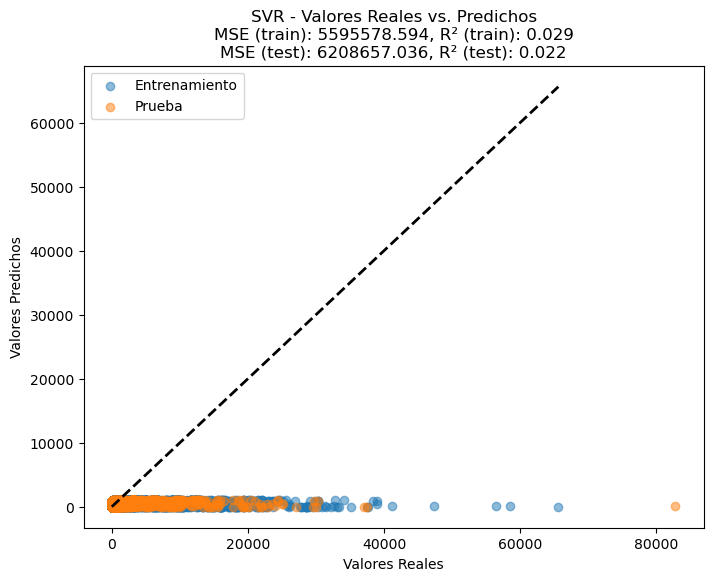

In [22]:
# Definir el modelo SVR
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_svr.predict(X_train)
y_pred_test = model_svr.predict(X_test)

# Métricas de evaluación para entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Métricas de evaluación para prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('svr.png')  # Guardar el gráfico en PNG
plt.show()

/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Linear SVR
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 3569305.939
    - Raíz del Error Cuadrático Medio (RMSE): 1889.261
    - Error Absoluto Medio (MAE): 708.756
    - Coeficiente de Determinación (R²): 0.380
  - Prueba:
    - Error Cuadrático Medio (MSE): 3838934.512
    - Raíz del Error Cuadrático Medio (RMSE): 1959.320
    - Error Absoluto Medio (MAE): 708.176
    - Coeficiente de Determinación (R²): 0.395


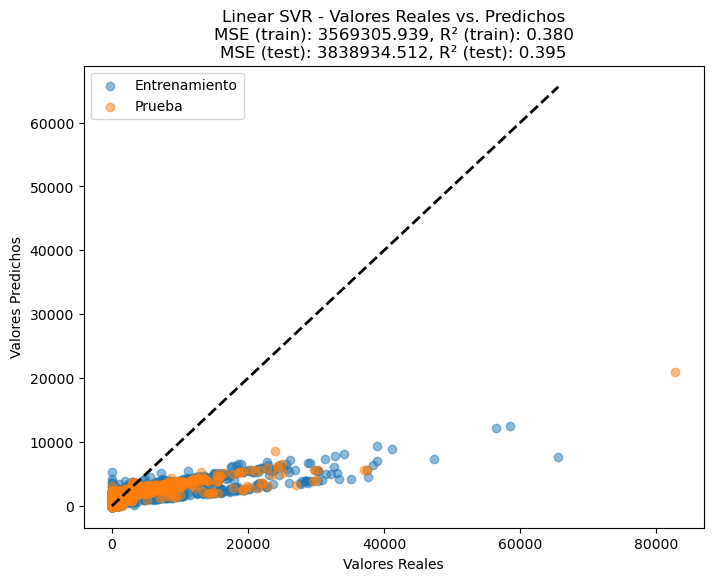

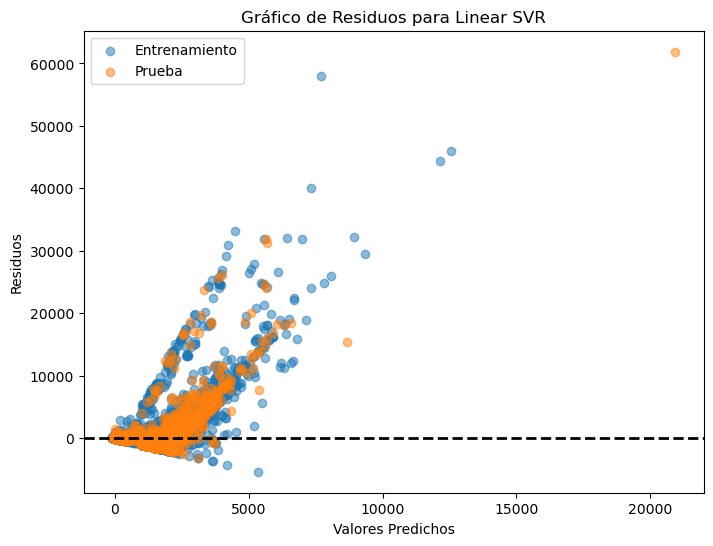

In [23]:
# Definir el modelo Linear SVR
model_linear_svr = LinearSVR()
model_linear_svr.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_linear_svr.predict(X_train)
y_pred_test = model_linear_svr.predict(X_test)

# Métricas de evaluación para entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Métricas de evaluación para prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Linear SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Linear SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('linear_svr.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Linear SVR')
plt.legend()
plt.savefig('residuos_linear_svr.png')  # Guardar el gráfico de residuos en PNG
plt.show()

/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Modelo: Nu SVR
  - Entrenamiento:
    - Error Cuadrático Medio (MSE): 5569103.400
    - Raíz del Error Cuadrático Medio (RMSE): 2359.895
    - Error Absoluto Medio (MAE): 619.806
    - Coeficiente de Determinación (R²): 0.033
  - Prueba:
    - Error Cuadrático Medio (MSE): 6182081.462
    - Raíz del Error Cuadrático Medio (RMSE): 2486.379
    - Error Absoluto Medio (MAE): 627.068
    - Coeficiente de Determinación (R²): 0.026


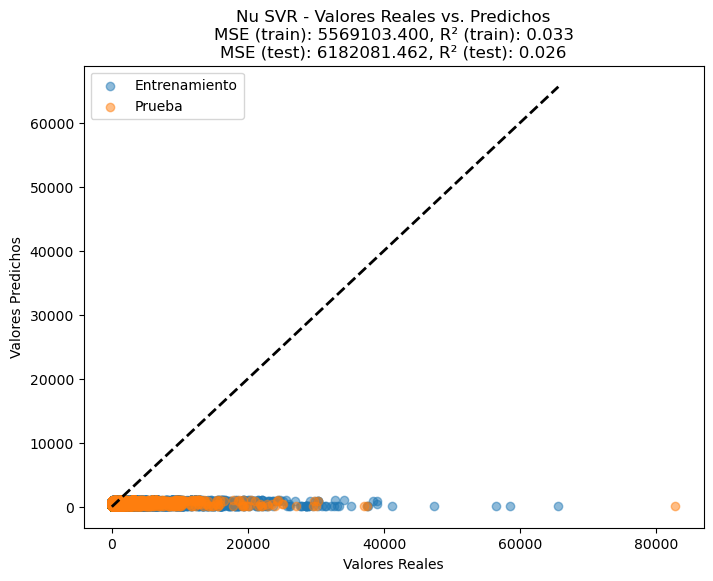

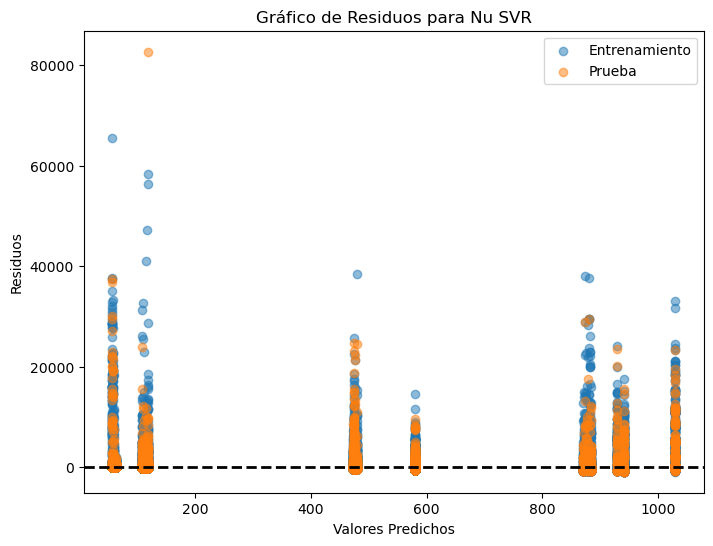

In [24]:
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Definir el modelo Nu SVR
model_nu_svr = NuSVR()
model_nu_svr.fit(X_train, y_train)

# Predicciones en entrenamiento y prueba
y_pred_train = model_nu_svr.predict(X_train)
y_pred_test = model_nu_svr.predict(X_test)

# Métricas de evaluación para entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Métricas de evaluación para prueba
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Imprimir métricas
print("\nModelo: Nu SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Nu SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('nu_svr.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_train, y_train - y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_pred_test, y_test - y_pred_test, label='Prueba', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Nu SVR')
plt.legend()
plt.savefig('residuos_nu_svr.png')  # Guardar el gráfico de residuos en PNG
plt.show()


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 22358, number of used features: 10
[LightGBM] [Info] Start training from score 679.363643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

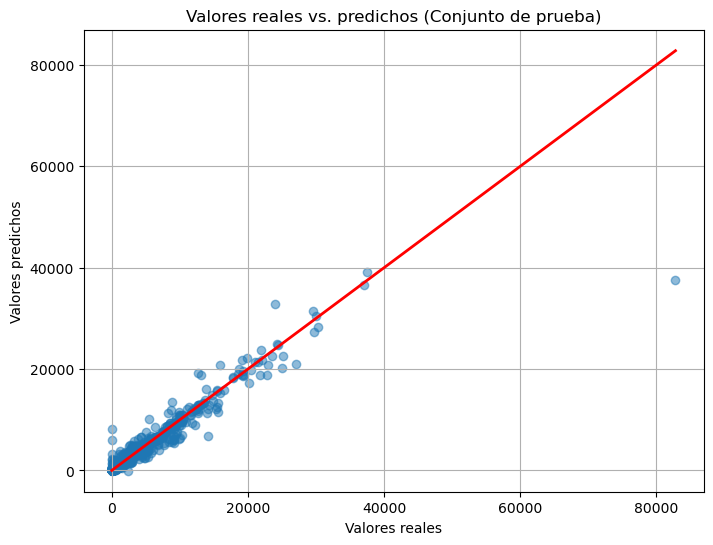

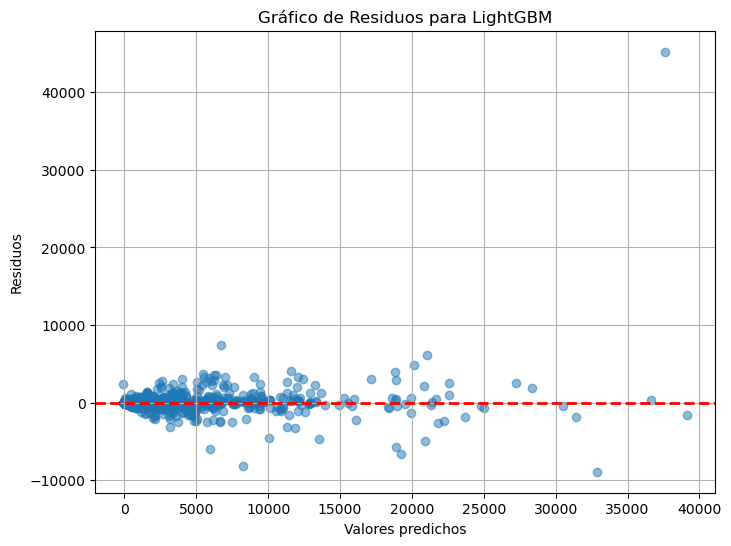

In [25]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)

    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)

    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=2,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,  # Usar la pérdida de Huber como métrica de scoring
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluación en el conjunto de prueba
y_pred_test = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
huber_test = calculate_huber_loss(y_test, y_pred_test)

print("\nEvaluación en conjunto de prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")
print(f"    - Pérdida de Huber: {huber_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs. predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.savefig('lightgbm_predicciones.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos para LightGBM")
plt.grid(True)
plt.savefig('residuos_lightgbm.png')  # Guardar el gráfico de residuos en PNG
plt.show()


In [26]:


# Definir la variable objetivo
y = 'generacion_estimado_gwh_2017_imputada'

# Variables Predictoras (incluyendo la nueva columna)
X = [
    'capacidad_mw',
    'capacidad_total',
    'factor_capacidad_combustible',
    'factor_capacidad_planta',
    'factor_capacidad_individual',
    'participacion_relativa_nacional',
    'año_apertura',
    'anual_datos_capacidad',
    'latitud',
    'longitud',
]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

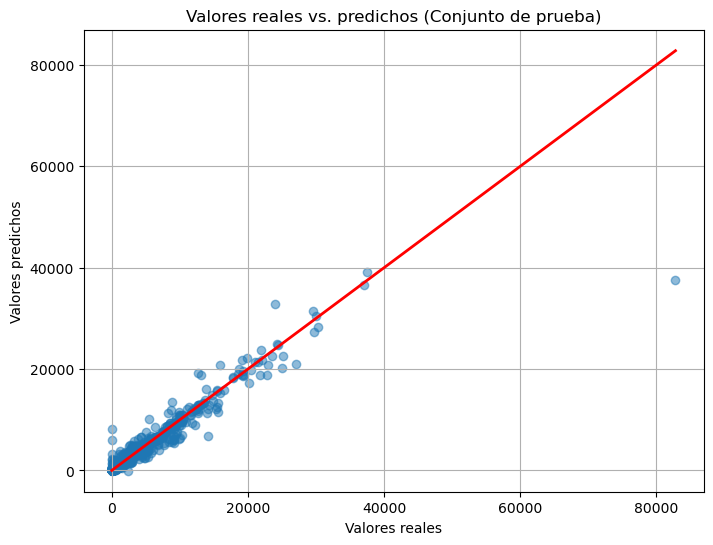

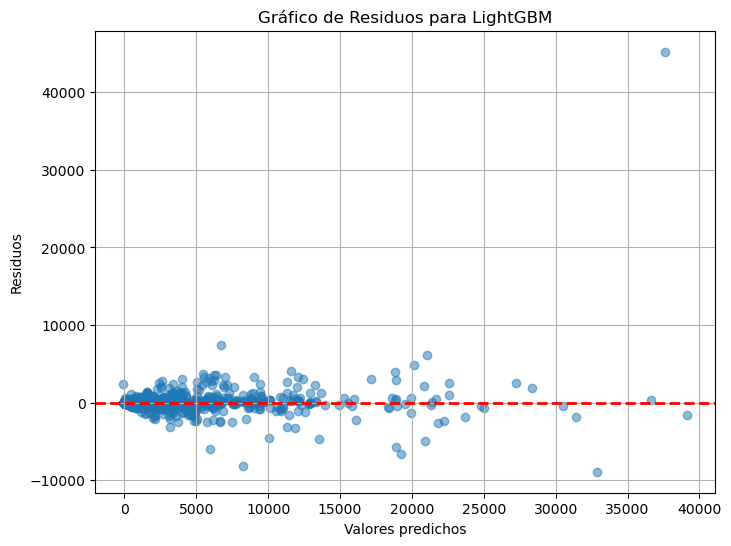

<Figure size 800x600 with 0 Axes>

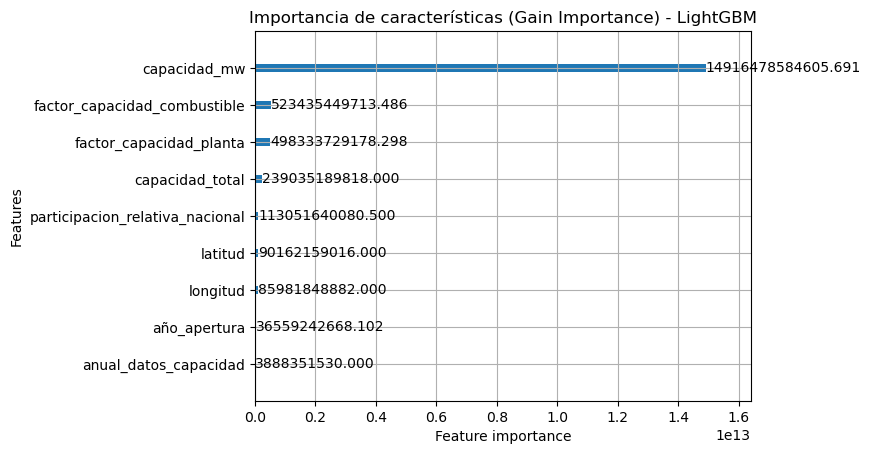


Importancia de características en porcentaje:
    - capacidad_mw: 24.16%
    - capacidad_total: 15.42%
    - factor_capacidad_combustible: 17.79%
    - factor_capacidad_planta: 10.20%
    - factor_capacidad_individual: 0.00%
    - participacion_relativa_nacional: 10.38%
    - año_apertura: 3.26%
    - anual_datos_capacidad: 0.92%
    - latitud: 7.86%
    - longitud: 10.00%


In [27]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)

    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)

    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=2,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,  # Usar la pérdida de Huber como métrica de scoring
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluación en el conjunto de prueba
y_pred_test = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
huber_test = calculate_huber_loss(y_test, y_pred_test)

print("\nEvaluación en conjunto de prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")
print(f"    - Pérdida de Huber: {huber_test:.3f}")

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs. predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.savefig('lightgbm_predicciones.png')  # Guardar el gráfico en PNG
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
residuos = y_test - y_pred_test
plt.scatter(y_pred_test, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos para LightGBM")
plt.grid(True)
plt.savefig('residuos_lightgbm.png')  # Guardar el gráfico de residuos en PNG
plt.show()

# Gráfico de importancia de características (Gain Importance)
plt.figure(figsize=(8, 6))
lgb.plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title("Importancia de características (Gain Importance) - LightGBM")
plt.savefig('lightgbm_importancia_gain.png')
plt.show()

# Imprimir la importancia de características en porcentaje
importance_df = random_search.best_estimator_.feature_importances_
features = X_train.columns  # Asegúrate de que X_train tenga nombres de columnas

importance_percentage = 100 * (importance_df / importance_df.sum())

print("\nImportancia de características en porcentaje:")
for feature, importance in zip(features, importance_percentage):
    print(f"    - {feature}: {importance:.2f}%")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

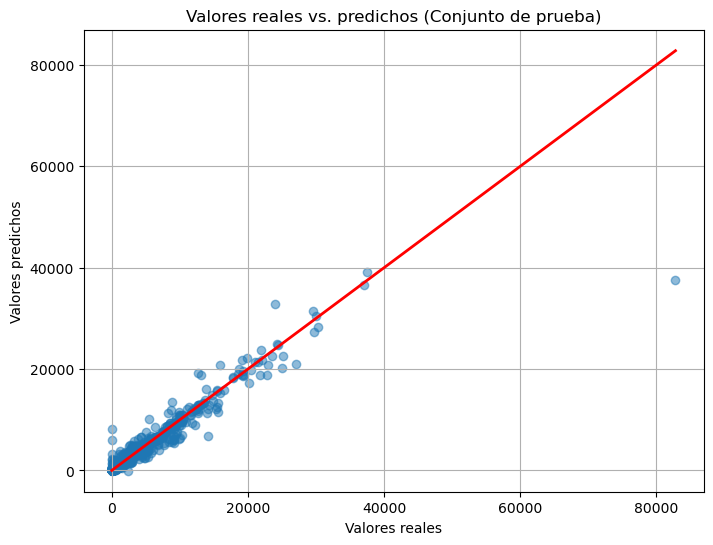

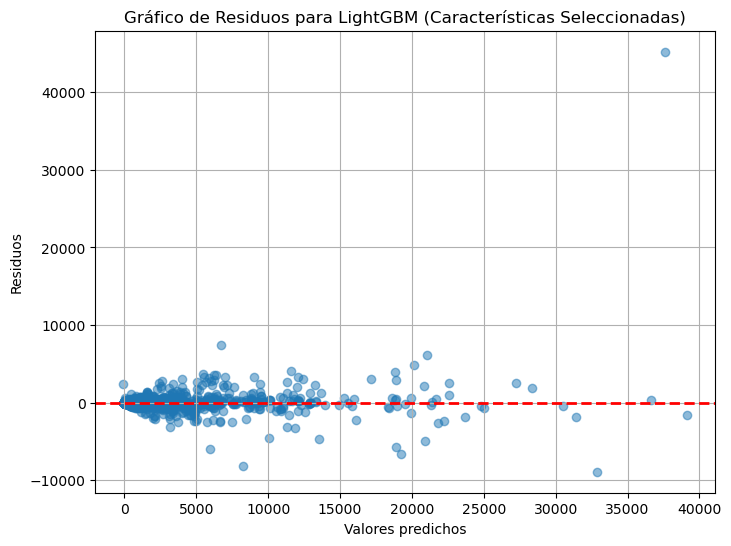

<Figure size 800x600 with 0 Axes>

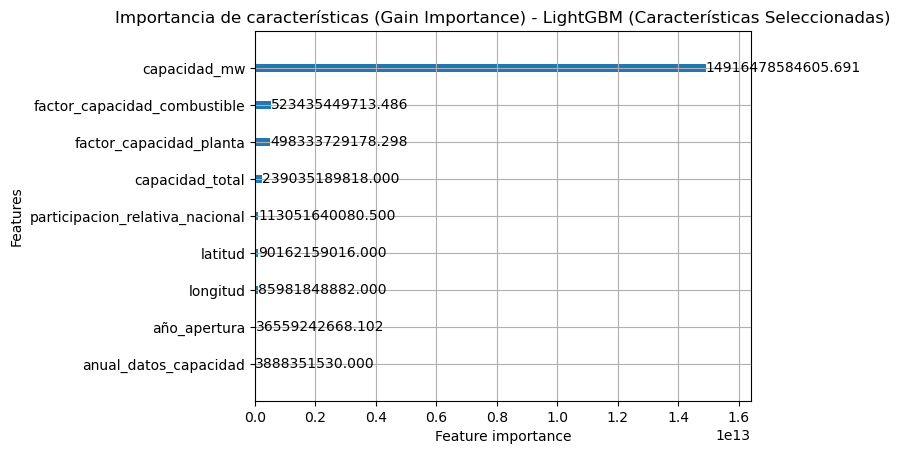


Importancia de características en porcentaje (Características Seleccionadas):
    - capacidad_mw: 24.16%
    - capacidad_total: 15.42%
    - factor_capacidad_combustible: 17.79%
    - factor_capacidad_planta: 10.20%
    - factor_capacidad_individual: 0.00%
    - participacion_relativa_nacional: 10.38%
    - año_apertura: 3.26%
    - anual_datos_capacidad: 0.92%
    - latitud: 7.86%
    - longitud: 10.00%


In [28]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)
    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=2,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Seleccionar características usando RFE
selector = RFE(estimator=random_search.best_estimator_, n_features_to_select=10)  # Cambia el número según necesites
selector.fit(X_train, y_train)

# Filtrar el conjunto de datos para incluir solo las características seleccionadas
X_train_selected = X_train.loc[:, selector.support_]
X_test_selected = X_test.loc[:, selector.support_]

# Volver a entrenar el modelo con las características seleccionadas
random_search.fit(X_train_selected, y_train)

# Evaluación en el conjunto de prueba con las características seleccionadas
y_pred_test_selected = random_search.best_estimator_.predict(X_test_selected)
mse_test_selected = mean_squared_error(y_test, y_pred_test_selected)
mae_test_selected = mean_absolute_error(y_test, y_pred_test_selected)
r2_test_selected = r2_score(y_test, y_pred_test_selected)
huber_test_selected = calculate_huber_loss(y_test, y_pred_test_selected)

print("\nEvaluación en conjunto de prueba (con características seleccionadas):")
print(f"    - Error Cuadrático Medio (MSE): {mse_test_selected:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test_selected:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test_selected:.3f}")
print(f"    - Pérdida de Huber: {huber_test_selected:.3f}")

# Gráficos como antes (valores reales vs. predichos, residuos, importancia de características)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_selected, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs. predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.savefig('lightgbm_predicciones_seleccionadas.png')
plt.show()

# Gráfico de residuos
plt.figure(figsize=(8, 6))
residuos = y_test - y_pred_test_selected
plt.scatter(y_pred_test_selected, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos para LightGBM (Características Seleccionadas)")
plt.grid(True)
plt.savefig('residuos_lightgbm_seleccionados.png')
plt.show()

# Gráfico de importancia de características (Gain Importance)
plt.figure(figsize=(8, 6))
lgb.plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title("Importancia de características (Gain Importance) - LightGBM (Características Seleccionadas)")
plt.savefig('lightgbm_importancia_gain_seleccionadas.png')
plt.show()

# Imprimir la importancia de características en porcentaje
importance_df = random_search.best_estimator_.feature_importances_
features = X_train.columns[selector.support_]

importance_percentage = 100 * (importance_df / importance_df.sum())

print("\nImportancia de características en porcentaje (Características Seleccionadas):")
for feature, importance in zip(features, importance_percentage):
    print(f"    - {feature}: {importance:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

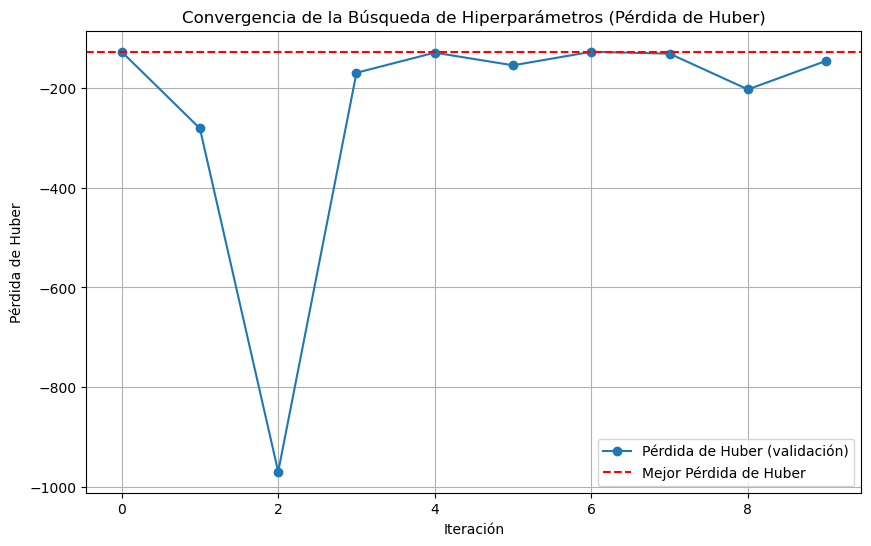


Evaluación en conjunto de prueba:
    - Error Cuadrático Medio (MSE): 446737.015
    - Error Absoluto Medio (MAE): 94.606
    - Coeficiente de Determinación (R²): 0.930
    - Pérdida de Huber: 126.835


<Figure size 1000x600 with 0 Axes>

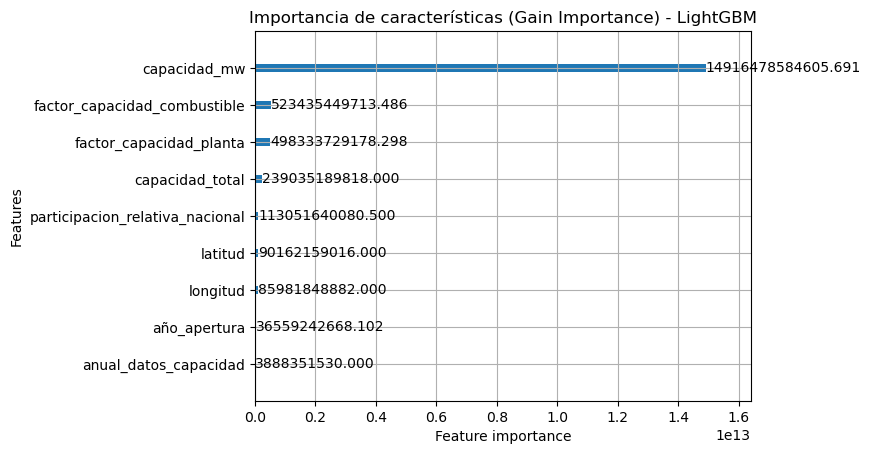

/home/vboxuser/miniconda3/envs/jupyter_env/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Características seleccionadas:
Index(['capacidad_mw', 'capacidad_total', 'factor_capacidad_combustible',
       'factor_capacidad_planta', 'participacion_relativa_nacional',
       'longitud'],
      dtype='object')


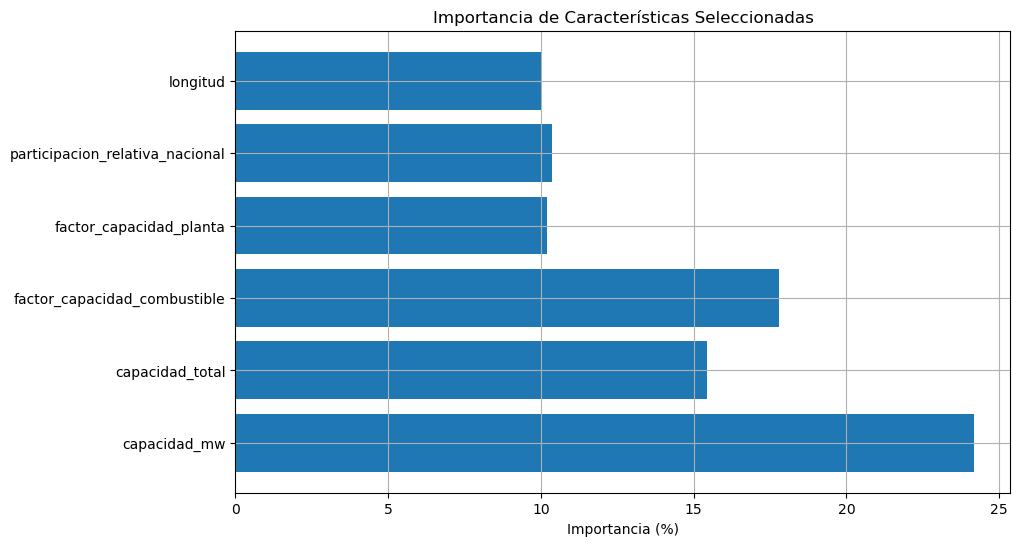


Importancia de características en porcentaje:
    - capacidad_mw: 24.16%
    - capacidad_total: 15.42%
    - factor_capacidad_combustible: 17.79%
    - factor_capacidad_planta: 10.20%
    - factor_capacidad_individual: 0.00%
    - participacion_relativa_nacional: 10.38%
    - año_apertura: 3.26%
    - anual_datos_capacidad: 0.92%
    - latitud: 7.86%
    - longitud: 10.00%


In [29]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)
    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True  # Almacenar la puntuación de entrenamiento
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Gráfica de convergencia basada en el scorer de Huber
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(random_search.cv_results_['mean_test_score'])),
         random_search.cv_results_['mean_test_score'],
         label='Pérdida de Huber (validación)',
         marker='o')

plt.title('Convergencia de la Búsqueda de Hiperparámetros (Pérdida de Huber)')
plt.xlabel('Iteración')
plt.ylabel('Pérdida de Huber')
plt.axhline(y=random_search.best_score_, color='r', linestyle='--', label='Mejor Pérdida de Huber')
plt.legend()
plt.grid()
plt.savefig('convergencia_huber.png')
plt.show()

# Evaluación en el conjunto de prueba
y_pred_test = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
huber_test = calculate_huber_loss(y_test, y_pred_test)

print("\nEvaluación en conjunto de prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")
print(f"    - Pérdida de Huber: {huber_test:.3f}")

# Gráfico de importancia de características (Gain Importance)
plt.figure(figsize=(10, 6))
lgb.plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title("Importancia de características (Gain Importance) - LightGBM")
plt.savefig('lightgbm_importancia_gain.png')
plt.show()

# Seleccionar características importantes
selector = SelectFromModel(random_search.best_estimator_, prefit=True, threshold='mean')
X_important = selector.transform(X_train)

print("\nCaracterísticas seleccionadas:")
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

# Gráfico de la importancia de las características seleccionadas
importance_df = random_search.best_estimator_.feature_importances_
importance_percentage = 100 * (importance_df / importance_df.sum())

# Graficar la importancia de características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance_percentage[selector.get_support()])
plt.xlabel('Importancia (%)')
plt.title('Importancia de Características Seleccionadas')
plt.grid()
plt.savefig('importancia_caracteristicas_seleccionadas.png')
plt.show()

# Imprimir la importancia de características en porcentaje
print("\nImportancia de características en porcentaje:")
for feature, importance in zip(X_train.columns, importance_percentage):
    print(f"    - {feature}: {importance:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 22358, number of used features: 10
[LightGBM] [Info] Start training from score 685.582229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

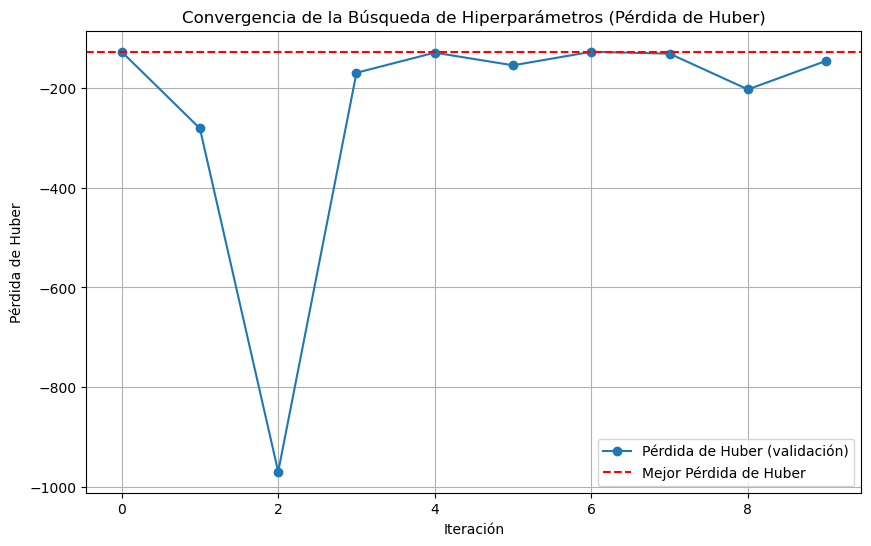


Evaluación en conjunto de prueba:
    - Error Cuadrático Medio (MSE): 446737.015
    - Error Absoluto Medio (MAE): 94.606
    - Coeficiente de Determinación (R²): 0.930
    - Pérdida de Huber: 126.835


<Figure size 1000x600 with 0 Axes>

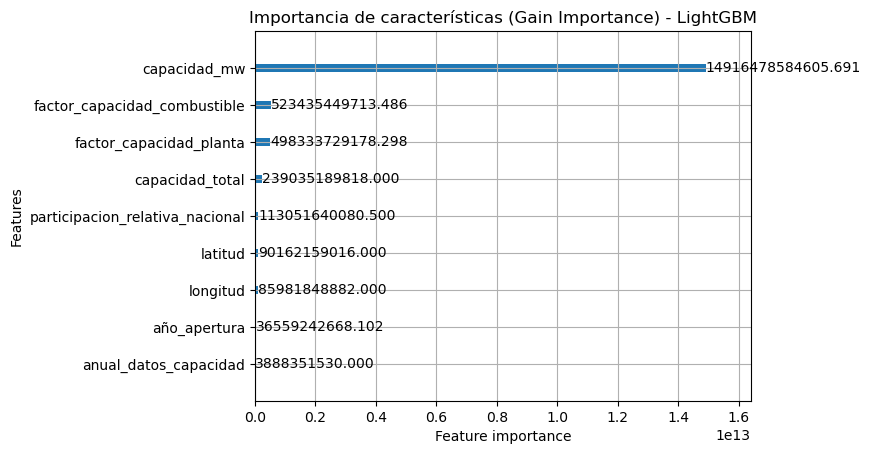


Características seleccionadas:
Index(['capacidad_mw', 'capacidad_total', 'factor_capacidad_combustible',
       'factor_capacidad_planta', 'participacion_relativa_nacional',
       'longitud'],
      dtype='object')


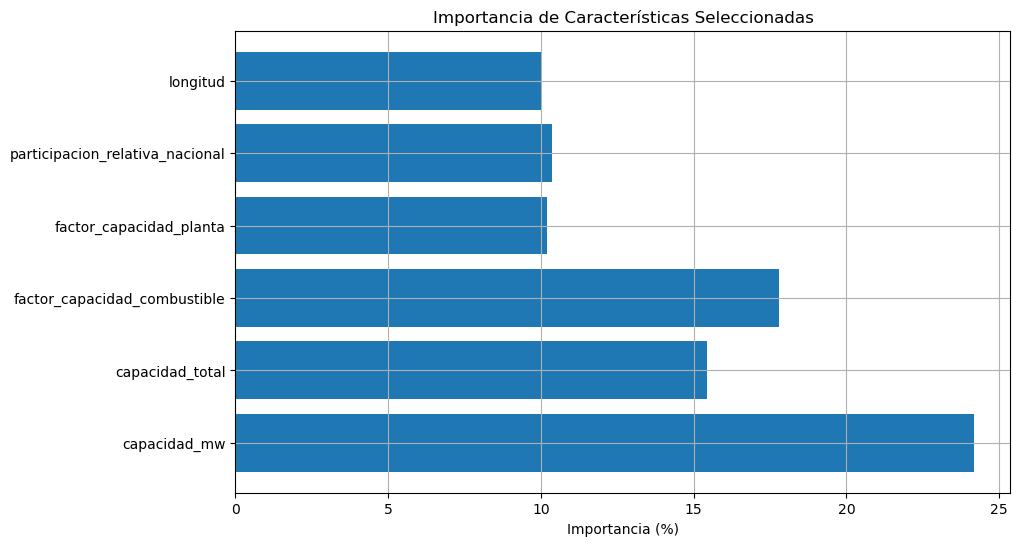


Importancia de características en porcentaje:
    - capacidad_mw: 24.16%
    - capacidad_total: 15.42%
    - factor_capacidad_combustible: 17.79%
    - factor_capacidad_planta: 10.20%
    - factor_capacidad_individual: 0.00%
    - participacion_relativa_nacional: 10.38%
    - año_apertura: 3.26%
    - anual_datos_capacidad: 0.92%
    - latitud: 7.86%
    - longitud: 10.00%
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [33]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)
    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True  # Almacenar la puntuación de entrenamiento
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Gráfica de convergencia basada en el scorer de Huber
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(random_search.cv_results_['mean_test_score'])),
         random_search.cv_results_['mean_test_score'],
         label='Pérdida de Huber (validación)',
         marker='o')

plt.title('Convergencia de la Búsqueda de Hiperparámetros (Pérdida de Huber)')
plt.xlabel('Iteración')
plt.ylabel('Pérdida de Huber')
plt.axhline(y=random_search.best_score_, color='r', linestyle='--', label='Mejor Pérdida de Huber')
plt.legend()
plt.grid()
plt.savefig('convergencia_huber.png')
plt.show()

# Evaluación en el conjunto de prueba
y_pred_test = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
huber_test = calculate_huber_loss(y_test, y_pred_test)

print("\nEvaluación en conjunto de prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")
print(f"    - Pérdida de Huber: {huber_test:.3f}")

# Gráfico de importancia de características (Gain Importance)
plt.figure(figsize=(10, 6))
lgb.plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title("Importancia de características (Gain Importance) - LightGBM")
plt.savefig('lightgbm_importancia_gain.png')
plt.show()

# Seleccionar características importantes
selector = SelectFromModel(random_search.best_estimator_, prefit=True, threshold='mean')
X_important = selector.transform(X_train)

print("\nCaracterísticas seleccionadas:")
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

# Gráfico de la importancia de las características seleccionadas
importance_df = random_search.best_estimator_.feature_importances_
importance_percentage = 100 * (importance_df / importance_df.sum())

# Graficar la importancia de características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance_percentage[selector.get_support()])
plt.xlabel('Importancia (%)')
plt.title('Importancia de Características Seleccionadas')
plt.grid()
plt.savefig('importancia_caracteristicas_seleccionadas.png')
plt.show()

# Imprimir la importancia de características en porcentaje
print("\nImportancia de características en porcentaje:")
for feature, importance in zip(X_train.columns, importance_percentage):
    print(f"    - {feature}: {importance:.2f}%")



In [30]:
# Combinar latitd y  en una sola columna

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1882
[LightGBM] [Info] Number of data points in the train set: 22358, number of used features: 10
[LightGBM] [Info] Start training from score 668.332763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

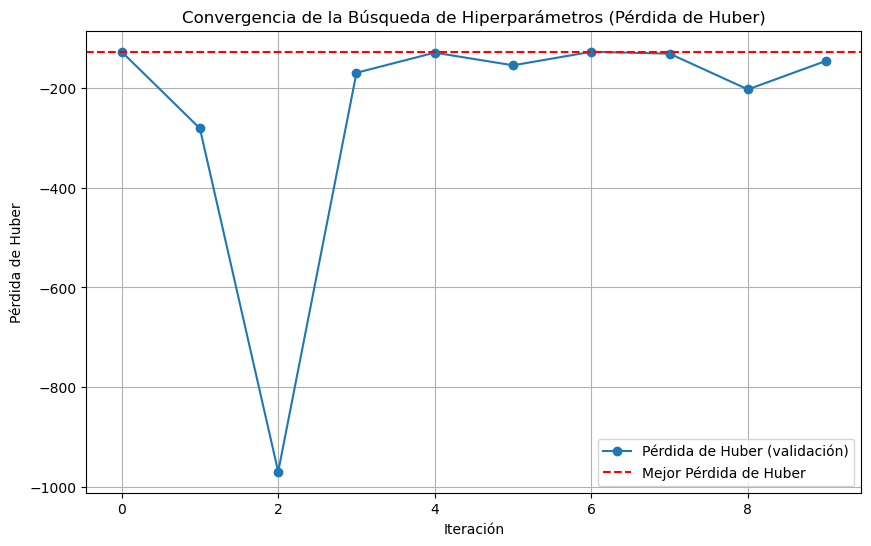

[LightGBM] [Info] Start training from score 679.363643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

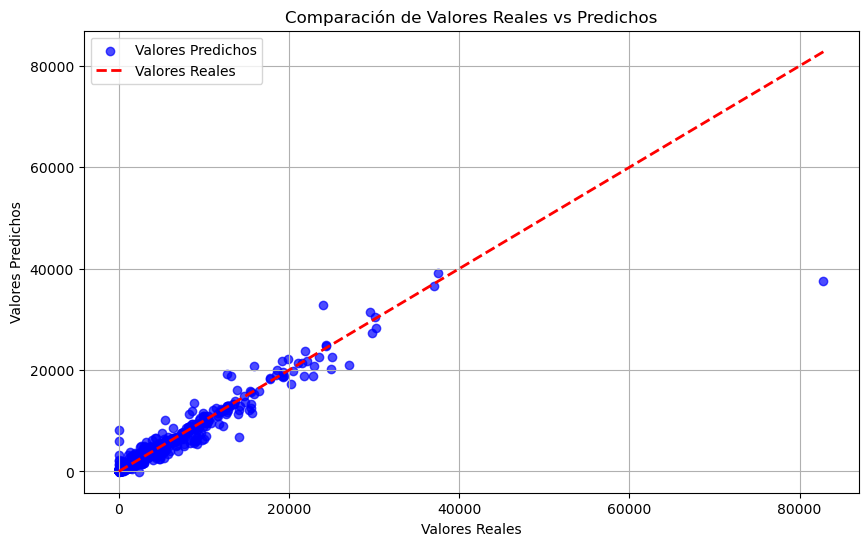

<Figure size 1000x600 with 0 Axes>

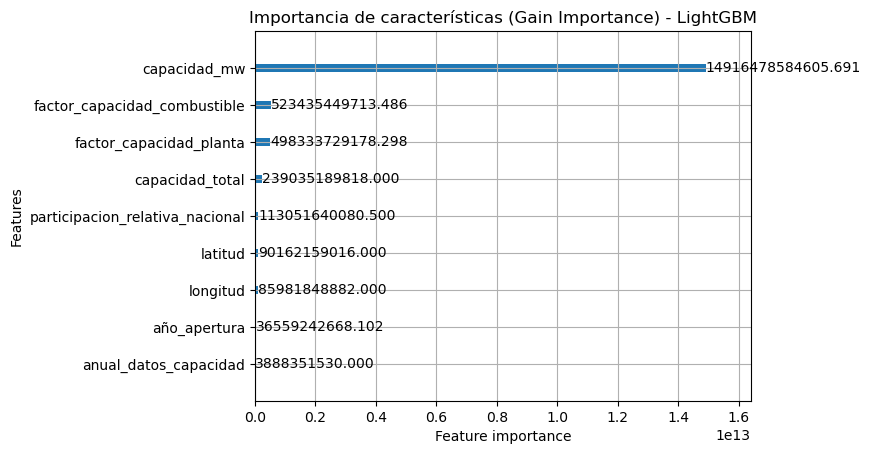


Características seleccionadas:
Index(['capacidad_mw', 'capacidad_total', 'factor_capacidad_combustible',
       'factor_capacidad_planta', 'participacion_relativa_nacional',
       'longitud'],
      dtype='object')


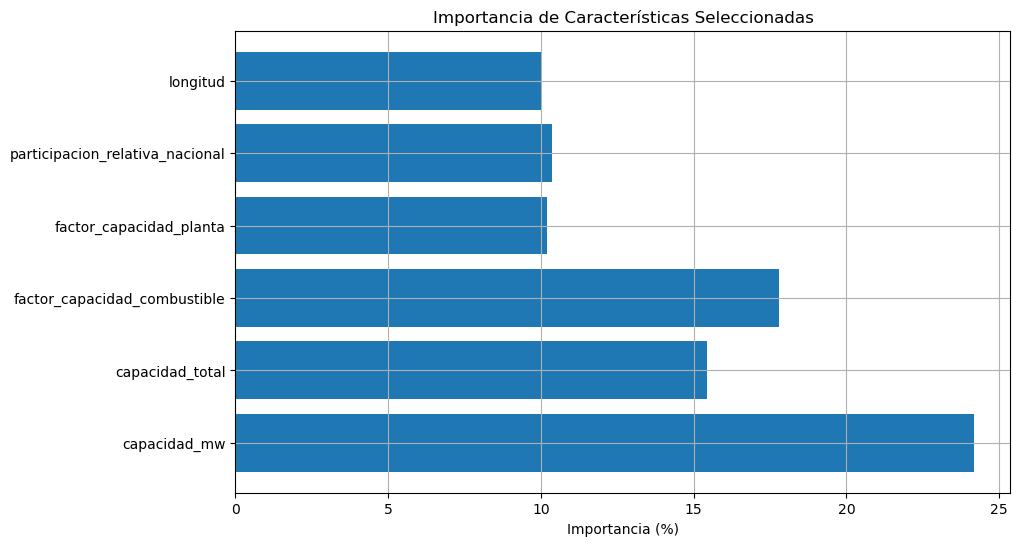


Importancia de características en porcentaje:
    - capacidad_mw: 24.16%
    - capacidad_total: 15.42%
    - factor_capacidad_combustible: 17.79%
    - factor_capacidad_planta: 10.20%
    - factor_capacidad_individual: 0.00%
    - participacion_relativa_nacional: 10.38%
    - año_apertura: 3.26%
    - anual_datos_capacidad: 0.92%
    - latitud: 7.86%
    - longitud: 10.00%
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [34]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

# Definición de la función para calcular la pérdida de Huber
def calculate_huber_loss(y_true, y_pred, delta=1.35):
    error = y_true - y_pred
    abs_error = np.abs(error)
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (abs_error - 0.5 * delta)
    return np.where(abs_error < delta, squared_loss, linear_loss).mean()

# Creamos el scorer personalizado usando la función de pérdida de Huber
huber_scorer = make_scorer(calculate_huber_loss, greater_is_better=False)

# Definición del modelo LightGBM
model_lgbm = lgb.LGBMRegressor(boosting_type='gbdt', n_jobs=-1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'num_leaves': randint(20, 40),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 0.01),
    'n_estimators': randint(100, 1500)
}

# Definir la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Búsqueda aleatoria de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias a probar
    cv=kf,
    scoring=huber_scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True  # Almacenar la puntuación de entrenamiento
)

# Entrenar el modelo con la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Gráfica de convergencia basada en el scorer de Huber
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(random_search.cv_results_['mean_test_score'])),
         random_search.cv_results_['mean_test_score'],
         label='Pérdida de Huber (validación)',
         marker='o')

plt.title('Convergencia de la Búsqueda de Hiperparámetros (Pérdida de Huber)')
plt.xlabel('Iteración')
plt.ylabel('Pérdida de Huber')
plt.axhline(y=random_search.best_score_, color='r', linestyle='--', label='Mejor Pérdida de Huber')
plt.legend()
plt.grid()
plt.savefig('convergencia_huber.png')
plt.show()

# Evaluación en el conjunto de prueba
y_pred_test = random_search.best_estimator_.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
huber_test = calculate_huber_loss(y_test, y_pred_test)

print("\nEvaluación en conjunto de prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Error Absoluto Medio (MAE): {mae_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")
print(f"    - Pérdida de Huber: {huber_test:.3f}")

# Gráfico de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='b', label='Valores Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos')
plt.legend()
plt.grid()
plt.savefig('real_vs_pred.png')
plt.show()

# Gráfico de importancia de características (Gain Importance)
plt.figure(figsize=(10, 6))
lgb.plot_importance(random_search.best_estimator_, max_num_features=10, importance_type='gain')
plt.title("Importancia de características (Gain Importance) - LightGBM")
plt.savefig('lightgbm_importancia_gain.png')
plt.show()

# Seleccionar características importantes
selector = SelectFromModel(random_search.best_estimator_, prefit=True, threshold='mean')
X_important = selector.transform(X_train)

print("\nCaracterísticas seleccionadas:")
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

# Gráfico de la importancia de las características seleccionadas
importance_df = random_search.best_estimator_.feature_importances_
importance_percentage = 100 * (importance_df / importance_df.sum())

# Graficar la importancia de características seleccionadas
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importance_percentage[selector.get_support()])
plt.xlabel('Importancia (%)')
plt.title('Importancia de Características Seleccionadas')
plt.grid()
plt.savefig('importancia_caracteristicas_seleccionadas.png')
plt.show()

# Imprimir la importancia de características en porcentaje
print("\nImportancia de características en porcentaje:")
for feature, importance in zip(X_train.columns, importance_percentage):
    print(f"    - {feature}: {importance:.2f}%")


In [31]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
# 2. Regresión Ridge
model_ridge = Ridge(alpha=1.0) 
model_ridge.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_ridge.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluación en prueba
y_pred_test = model_ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: Regresión Ridge")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Ridge - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_ridge.png')  # Guardar el gráfico en PNG
plt.show()


In [ ]:
# 3. Regresión Lasso
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_lasso.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluación en prueba
y_pred_test = model_lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: Regresión Lasso")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión Lasso - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R² (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R² (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_lasso.png')  # Guardar el gráfico en PNG
plt.show()

In [ ]:
# 4. Regresión ElasticNet
model_elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
model_elasticnet.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_elasticnet.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
# Evaluación en prueba
y_pred_test = model_elasticnet.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: Regresión ElasticNet")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Regresión ElasticNet - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R\u00b2 (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R\u00b2 (test): {r2_test:.3f}')
plt.legend()
plt.savefig('regresion_elastic_net.png')  # Guardar el gráfico en PNG
plt.show()

In [ ]:
# 5. Máquinas de Soporte Vectorial (SVR)
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_svr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluación en prueba
y_pred_test = model_svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R\u00b2 (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R\u00b2 (test): {r2_test:.3f}')
plt.legend()
plt.savefig('svr.png')  # Guardar el gráfico en PNG
plt.show()


In [ ]:
# 6. Linear SVR
model_linear_svr = LinearSVR()
model_linear_svr.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_linear_svr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluación en prueba
y_pred_test = model_linear_svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: Linear SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Linear SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R\u00b2 (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R\u00b2 (test): {r2_test:.3f}')
plt.legend()
plt.savefig('linear_svr.png')  # Guardar el gráfico en PNG
plt.show()


In [ ]:
# 7. Nu SVR
model_nu_svr = NuSVR()
model_nu_svr.fit(X_train, y_train)

# Evaluación en entrenamiento
y_pred_train = model_nu_svr.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluación en prueba
y_pred_test = model_nu_svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Impresión de métricas
print("\nModelo: Nu SVR")
print("  - Entrenamiento:")
print(f"    - Error Cuadrático Medio (MSE): {mse_train:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_train:.3f}")
print("  - Prueba:")
print(f"    - Error Cuadrático Medio (MSE): {mse_test:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_test:.3f}")

# Gráfico de regresión
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, label='Entrenamiento', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Prueba', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title(f'Nu SVR - Valores Reales vs. Predichos\nMSE (train): {mse_train:.3f}, R\u00b2 (train): {r2_train:.3f}\nMSE (test): {mse_test:.3f}, R\u00b2 (test): {r2_test:.3f}')
plt.legend()
plt.savefig('nu_svr.png')  # Guardar el gráfico en PNG
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la pérdida de Huber
def calcular_pérdida_huber(y_real, y_predicho, delta=1.35):
    error = y_real - y_predicho
    error_abs = np.abs(error)

    pérdida_cuadrada = 0.5 * error ** 2
    pérdida_lineal = delta * (error_abs - 0.5 * delta)

    return np.where(error_abs < delta, pérdida_cuadrada, pérdida_lineal).mean()

# Mejores hiperparámetros encontrados anteriormente
mejores_hiperparámetros = {
    'learning_rate': 0.004745401188473625, 
    'max_depth': 7, 
    'n_estimators': 1394, 
    'num_leaves': 30
}

# Definición del modelo LightGBM con los mejores hiperparámetros
modelo_lgbm = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_jobs=-1,
    learning_rate=mejores_hiperparámetros['learning_rate'],
    max_depth=mejores_hiperparámetros['max_depth'],
    n_estimators=mejores_hiperparámetros['n_estimators'],
    num_leaves=mejores_hiperparámetros['num_leaves']
)

# Entrenamiento del modelo
modelo_lgbm.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_train = modelo_lgbm.predict(X_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo_lgbm.predict(X_test)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_train, y_pred_train)
r2_entrenamiento = r2_score(y_train, y_pred_train)
huber_entrenamiento = calcular_pérdida_huber(y_train, y_pred_train)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de prueba
mse_prueba = mean_squared_error(y_test, y_pred_test)
r2_prueba = r2_score(y_test, y_pred_test)
huber_prueba = calcular_pérdida_huber(y_test, y_pred_test)

# Imprimir métricas de evaluación para entrenamiento y prueba
print("\nEvaluación en conjunto de **entrenamiento**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_entrenamiento:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_entrenamiento:.3f}")
print(f"    - Pérdida de Huber: {huber_entrenamiento:.3f}")

print("\nEvaluación en conjunto de **prueba**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_prueba:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_prueba:.3f}")
print(f"    - Pérdida de Huber: {huber_prueba:.3f}")

# Gráfico de valores reales vs predichos en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la pérdida de Huber
def calcular_pérdida_huber(y_real, y_predicho, delta=1.35):
    error = y_real - y_predicho
    error_abs = np.abs(error)

    pérdida_cuadrada = 0.5 * error ** 2
    pérdida_lineal = delta * (error_abs - 0.5 * delta)

    return np.where(error_abs < delta, pérdida_cuadrada, pérdida_lineal).mean()

# Mejores hiperparámetros encontrados anteriormente
mejores_hiperparámetros = {
    'learning_rate': 0.004745401188473625, 
    'max_depth': 7, 
    'n_estimators': 1394, 
    'num_leaves': 30
}

# Definición del modelo LightGBM con los mejores hiperparámetros
modelo_lgbm = lgb.LGBMRegressor(
    boosting_type='dart',
    n_jobs=-1,
    learning_rate=mejores_hiperparámetros['learning_rate'],
    max_depth=mejores_hiperparámetros['max_depth'],
    n_estimators=mejores_hiperparámetros['n_estimators'],
    num_leaves=mejores_hiperparámetros['num_leaves']
)

# Entrenamiento del modelo
modelo_lgbm.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_train = modelo_lgbm.predict(X_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo_lgbm.predict(X_test)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_train, y_pred_train)
r2_entrenamiento = r2_score(y_train, y_pred_train)
huber_entrenamiento = calcular_pérdida_huber(y_train, y_pred_train)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de prueba
mse_prueba = mean_squared_error(y_test, y_pred_test)
r2_prueba = r2_score(y_test, y_pred_test)
huber_prueba = calcular_pérdida_huber(y_test, y_pred_test)

# Imprimir métricas de evaluación para entrenamiento y prueba
print("\nEvaluación en conjunto de **entrenamiento**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_entrenamiento:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_entrenamiento:.3f}")
print(f"    - Pérdida de Huber: {huber_entrenamiento:.3f}")

print("\nEvaluación en conjunto de **prueba**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_prueba:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_prueba:.3f}")
print(f"    - Pérdida de Huber: {huber_prueba:.3f}")

# Gráfico de valores reales vs predichos en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.show()



In [ ]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la pérdida de Huber
def calcular_pérdida_huber(y_real, y_predicho, delta=1.35):
    error = y_real - y_predicho
    error_abs = np.abs(error)

    pérdida_cuadrada = 0.5 * error ** 2
    pérdida_lineal = delta * (error_abs - 0.5 * delta)

    return np.where(error_abs < delta, pérdida_cuadrada, pérdida_lineal).mean()

# Mejores hiperparámetros encontrados anteriormente
mejores_hiperparámetros = {
    'learning_rate': 0.004745401188473625, 
    'max_depth': 7, 
    'n_estimators': 1394, 
    'num_leaves': 30
}

# Definición del modelo LightGBM con los mejores hiperparámetros
modelo_lgbm = lgb.LGBMRegressor(
    boosting_type='goss',
    n_jobs=-1,
    learning_rate=mejores_hiperparámetros['learning_rate'],
    max_depth=mejores_hiperparámetros['max_depth'],
    n_estimators=mejores_hiperparámetros['n_estimators'],
    num_leaves=mejores_hiperparámetros['num_leaves']
)

# Entrenamiento del modelo
modelo_lgbm.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_train = modelo_lgbm.predict(X_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo_lgbm.predict(X_test)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_train, y_pred_train)
r2_entrenamiento = r2_score(y_train, y_pred_train)
huber_entrenamiento = calcular_pérdida_huber(y_train, y_pred_train)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de prueba
mse_prueba = mean_squared_error(y_test, y_pred_test)
r2_prueba = r2_score(y_test, y_pred_test)
huber_prueba = calcular_pérdida_huber(y_test, y_pred_test)

# Imprimir métricas de evaluación para entrenamiento y prueba
print("\nEvaluación en conjunto de **entrenamiento**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_entrenamiento:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_entrenamiento:.3f}")
print(f"    - Pérdida de Huber: {huber_entrenamiento:.3f}")

print("\nEvaluación en conjunto de **prueba**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_prueba:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_prueba:.3f}")
print(f"    - Pérdida de Huber: {huber_prueba:.3f}")

# Gráfico de valores reales vs predichos en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la pérdida de Huber
def calcular_pérdida_huber(y_real, y_predicho, delta=1.35):
    error = y_real - y_predicho
    error_abs = np.abs(error)

    pérdida_cuadrada = 0.5 * error ** 2
    pérdida_lineal = delta * (error_abs - 0.5 * delta)

    return np.where(error_abs < delta, pérdida_cuadrada, pérdida_lineal).mean()

# Mejores hiperparámetros encontrados anteriormente
mejores_hiperparámetros = {
    'learning_rate': 0.004745401188473625, 
    'max_depth': 7, 
    'n_estimators': 1394, 
    'num_leaves': 30
}

# Definición del modelo LightGBM con los mejores hiperparámetros
modelo_lgbm = lgb.LGBMRegressor(
    boosting_type='rf',
    n_jobs=-1,
    learning_rate=mejores_hiperparámetros['learning_rate'],
    max_depth=mejores_hiperparámetros['max_depth'],
    n_estimators=mejores_hiperparámetros['n_estimators'],
    num_leaves=mejores_hiperparámetros['num_leaves'],
    bagging_fraction=0.8,      # Ajusta el valor entre 0 y 1
    bagging_freq=5,           # Ajusta el valor mayor que 0
    feature_fraction=0.8       # Ajusta el valor entre 0 y 1
)


# Entrenamiento del modelo
modelo_lgbm.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_train = modelo_lgbm.predict(X_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo_lgbm.predict(X_test)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_train, y_pred_train)
r2_entrenamiento = r2_score(y_train, y_pred_train)
huber_entrenamiento = calcular_pérdida_huber(y_train, y_pred_train)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de prueba
mse_prueba = mean_squared_error(y_test, y_pred_test)
r2_prueba = r2_score(y_test, y_pred_test)
huber_prueba = calcular_pérdida_huber(y_test, y_pred_test)

# Imprimir métricas de evaluación para entrenamiento y prueba
print("\nEvaluación en conjunto de **entrenamiento**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_entrenamiento:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_entrenamiento:.3f}")
print(f"    - Pérdida de Huber: {huber_entrenamiento:.3f}")

print("\nEvaluación en conjunto de **prueba**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_prueba:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_prueba:.3f}")
print(f"    - Pérdida de Huber: {huber_prueba:.3f}")

# Gráfico de valores reales vs predichos en el conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs predichos (Conjunto de prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la pérdida de Huber
def calcular_perdida_huber(y_real, y_predicho, delta=1.35):
    error = y_real - y_predicho
    error_abs = np.abs(error)

    perdida_cuadrada = 0.5 * error ** 2
    perdida_lineal = delta * (error_abs - 0.5 * delta)

    return np.where(error_abs < delta, perdida_cuadrada, perdida_lineal).mean()

# Mejores hiperparámetros encontrados anteriormente
mejores_parametros = {
    'learning_rate': 0.004745401188473625, 
    'max_depth': 7, 
    'n_estimators': 1394, 
    'num_leaves': 30
}

# Definición del modelo LightGBM con los mejores hiperparámetros
modelo_lgbm = lgb.LGBMRegressor(
    boosting_type='gbdt',
    n_jobs=-1,
    learning_rate=mejores_parametros['learning_rate'],
    max_depth=mejores_parametros['max_depth'],
    n_estimators=mejores_parametros['n_estimators'],
    num_leaves=mejores_parametros['num_leaves']
)

# Entrenar el modelo
modelo_lgbm.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_pred_entrenamiento = modelo_lgbm.predict(X_train)

# Predicciones en el conjunto de prueba
y_pred_prueba = modelo_lgbm.predict(X_test)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_train, y_pred_entrenamiento)
r2_entrenamiento = r2_score(y_train, y_pred_entrenamiento)
huber_entrenamiento = calcular_perdida_huber(y_train, y_pred_entrenamiento)

# Evaluar usando la pérdida de Huber y otras métricas en el conjunto de prueba
mse_prueba = mean_squared_error(y_test, y_pred_prueba)
r2_prueba = r2_score(y_test, y_pred_prueba)
huber_prueba = calcular_perdida_huber(y_test, y_pred_prueba)

# Imprimir métricas de evaluación para entrenamiento y prueba
print("\nEvaluación en conjunto de **entrenamiento**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_entrenamiento:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_entrenamiento:.3f}")
print(f"    - Pérdida de Huber: {huber_entrenamiento:.3f}")

print("\nEvaluación en conjunto de **prueba**:")
print(f"    - Error Cuadrático Medio (MSE): {mse_prueba:.3f}")
print(f"    - Coeficiente de Determinación (R²): {r2_prueba:.3f}")
print(f"    - Pérdida de Huber: {huber_prueba:.3f}")

# Gráficos de valores reales vs predichos

# Crear una figura con dos subgráficos
plt.figure(figsize=(14, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_entrenamiento, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.title("Valores reales vs predichos (Entrenamiento)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_prueba, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Valores reales vs predichos (Prueba)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.grid(True)

plt.tight_layout()
plt.show()


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f